# Исследовательский анализ данных в сфере недвижимости

Рынок недвижимости в Санкт-Петербурге и ближайших населенных пунктах может иметь свои особенности. Данный проект учебный, направлен на изучение данных, их предобработку, визуализацию, поиск закономерностей.

**Цель исследования:** найти параметры, которые могут влиять на стоимость недвижимости, скорость ее продажи, чтобы оценить основные тенденции рынка недвижимости в Санкт-Петербурге и ближайших населенных пунктах.

**Описание данных:**
Данные получены из файла `real_estate_data`, который предоставлен сервисом Яндекс Недвижимость

-`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м) \
-`balcony` — число балконов \
-`ceiling_height` — высота потолков (м) \
-`cityCenters_nearest` — расстояние до центра города (м) \
-`days_exposition` — сколько дней было размещено объявление (от публикации до снятия) \
-`first_day_exposition` — дата публикации \
-`floor` — этаж \
-`floors_total` — всего этажей в доме \
-`is_apartment` — апартаменты (булев тип) \
-`kitchen_area` — площадь кухни в квадратных метрах (м²) \
-`last_price` — цена на момент снятия с публикации \
-`living_area` — жилая площадь в квадратных метрах (м²) \
-`locality_name` — название населённого пункта \
-`open_plan` — свободная планировка (булев тип) \
-`parks_around3000` — число парков в радиусе 3 км \
-`parks_nearest` — расстояние до ближайшего парка (м) \
-`ponds_around3000` — число водоёмов в радиусе 3 км \
-`ponds_nearest` — расстояние до ближайшего водоёма (м) \
-`rooms` — число комнат \
-`studio` — квартира-студия (булев тип) \
-`total_area` — общая площадь квартиры в квадратных метрах (м²) \
-`total_images` — число фотографий квартиры в объявлении 

**Ход исследования:** 
1. Обзор данных
2. Предобработка данных
3. Визуализация данных
4. Формирование вывода

## 1. Обзор и предобработка данных

   ###  1.1 Ознакомление с данными

In [1]:
import pandas as pd

In [2]:
try:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
data.head(10) #посмотрим первые 10 строк таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


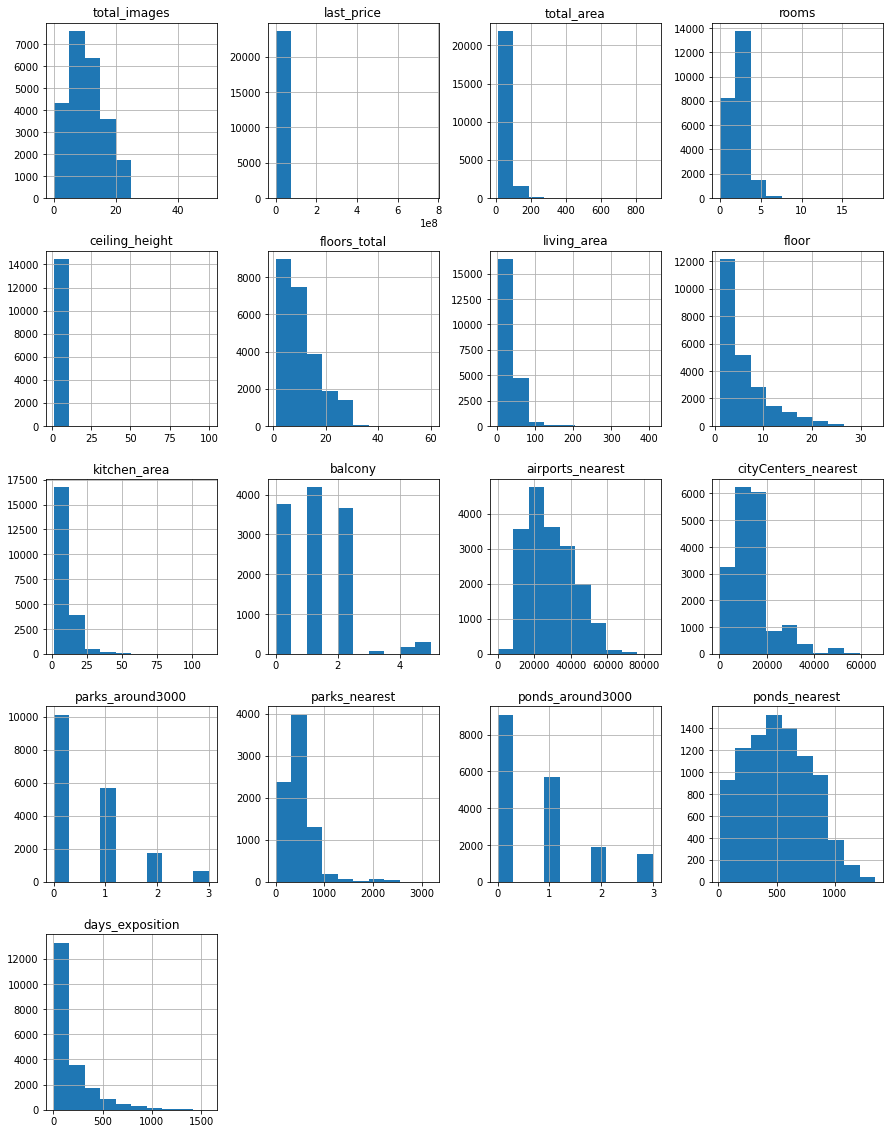

In [3]:
data.hist(figsize=(15,20)); #ознакомимся с гистограммами по всем числовым значениям в датафрейме

Смущает гистограмма по столбцу `last_price`: пик на значениях, близких к нулю. Возможно, есть выбросы, которые смещают данные, может быть, это связано с неверным типом данных или ошибками при заполнении: например не там указана точка, разделяющая целое от дроби. 

Также заметны выбросы данных в столбце `ceiling_height`, возмонжо, это связано с тем, что данные указаны в разных едниицах измерения (см и м)

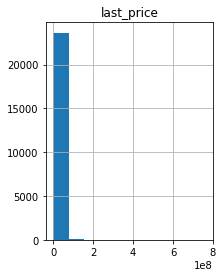

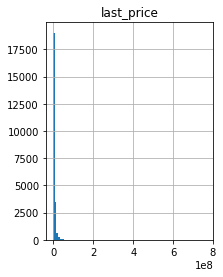

In [4]:
data.hist('last_price', bins=10, figsize=(3,4));
data.hist('last_price', bins=100, figsize=(3,4)); #попробоавала "поиграть" с количеством корзин, но это ничего не дало

Посмотрим общую информацию:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Обращает на себя внимание большое количество пропусков в столбце `is_apartment`: более 20 тысяч строк (что было заметно и при первом выводе). Пока не совсем понятно, что именно означает этот столбец. Апартаменты - в значении дом или в юридическом смысле (коммерческая недвижимость). Также заметны пропуски в столбцах о высоте потолков, общей площади и площади кухни, количестве балконов и в картографических данных.

При этом в столбце с ценой указан тип данных float и пропущенных значений нет, опять же возникают вопросы к гистограмме.

In [6]:
data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)
data.columns #не очень удовлетворило название столбца, перевела его в "змеиный" регистр

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Рекомендую создать универсальную функцию, которая будет на вход принимать датафрейм, а на выходе будет выводить все необходимые характеристики поочередно применяя методы head, describe, info, duplicated и т.п.
</div>

### 1.2 Работа с пропусками

Перед тем, как проводить предобработку сохраним старый датафрейм в переменную, чтобы проверить процент удаленных строк и создадим функцию для вывода необходимой информации после каждой обработки:

In [7]:
old_data = data

Для начала выведем таблицу по пропускам, где будет указано название столбца, сколько пропусков и какой процент занимают пропуски от общего числа строк.

In [8]:
miss_data = data.isna().sum(axis=0).reset_index()
miss_data.columns = ['column', 'missing']
miss_data = miss_data[miss_data['missing'] != 0]
miss_data['percent'] = (miss_data['missing'] / len(data))*100
miss_data.sort_values(by='percent', ascending=False)

,column,missing,percent
9,is_apartment,20924,88.290645
18,parks_nearest,15620,65.909954
20,ponds_nearest,14589,61.559559
13,balcony,11519,48.605426
5,ceiling_height,9195,38.799105
15,airports_nearest,5542,23.384953
16,city_centers_nearest,5519,23.287902
17,parks_around3000,5518,23.283683
19,ponds_around3000,5518,23.283683
21,days_exposition,3181,13.422507


Как и было заметно из общей информации, наибольший процент пропусков имеет столбце `is_apartment` (88%). Вероятнее всего, имеется в виду коммерческая недвижимость. И, возможно, люди, которые выкладывали объявление о продаже обычной жилой недвижимости просто игнорировали этот пункт, либо не совсем понимая, что именно он значит, либо не обращая внимания, тк термин "апартаменты" введен относительно недавно.
А вот те люди, которые выставляли объявление о продаже именно апартаментов как раз обращали внимание на этот пункт.

In [9]:
len(data[data['is_apartment'] == True])


50

Да, всего 50 значений `True`, то есть из 23 тыс объявлений лишь 50 о продаже апартаментов. Что похоже на правду. Считаю, что в данном случае пустые значения в строках можно заменить на `False`

In [10]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data.info() #заменяем пропуски на булевы значения и проверяем

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Совсем небольшой процент пропусков имеет столбец с населенными пунктами (0.2%). Можно предположить, что пропуски в данном столбце связаны с тем, что при размещении объявления люди просто не указывали название населенного пункта, может, чтобы объект показывался в списке объявлений из Питера, а может, наоборот Петербуржцы не омтечлаи город, думая, что и так понятно. Но нельзя исключить и технические причины пропусков, например, при выгрузке данных. 

In [11]:
data.loc[data['locality_name'].isna(), 'city_centers_nearest'].median()

8943.0

In [12]:
data.loc[data['locality_name'].isna(), 'city_centers_nearest'].max()

41294.0

Медианное значение расстояния до центра чуть меньше 9 км, при этом максимальное аж 41 км. Посмотрим, сколько из 49 пропусков содержат данные по расстоянию до центра.

In [13]:
len(data.loc[(data['locality_name'].isna()) & (data['city_centers_nearest'].isna()==False)])

41

Довольно внушительная часть. Я решила заполнить пропуски в названии населенного пункта, где расстояние до центра менее 10 км, ведь скорее всего, это в черте города. А остальные пропуски удалим, тк их будем совсем небольшая часть.

In [14]:
data.loc[(data['locality_name'].isna()) & (data['city_centers_nearest'] < 10000) 
        & ~(data['city_centers_nearest'].isna()), 'locality_name'] = 'Санкт-Петербург'
data['locality_name'].isna().sum()

24

In [15]:
data.dropna(subset=['locality_name'], inplace=True)
data.info() #удаляем строки, где пропущенны значения в столбце с населенным пунктом и проверяем

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23675 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23675 non-null  int64  
 1   last_price            23675 non-null  float64
 2   total_area            23675 non-null  float64
 3   first_day_exposition  23675 non-null  object 
 4   rooms                 23675 non-null  int64  
 5   ceiling_height        14499 non-null  float64
 6   floors_total          23590 non-null  float64
 7   living_area           21775 non-null  float64
 8   floor                 23675 non-null  int64  
 9   is_apartment          23675 non-null  bool   
 10  studio                23675 non-null  bool   
 11  open_plan             23675 non-null  bool   
 12  kitchen_area          21403 non-null  float64
 13  balcony               12162 non-null  float64
 14  locality_name         23675 non-null  object 
 15  airports_nearest   

Также небольшой процент пропущенных значений и в общей этажности дома, может быть, пропускают эти данные в квартирах на первом этаже, можно посмотреть.

In [16]:
data[data['floors_total'].isna()]#посмотрим строки с пропусками в столбце об общей этажности дома

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,False,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,False,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,False,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,False,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,NaN,3,False,False,False,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,False,False,False,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,False,False,False,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,NaN,NaN,50.40,18,False,False,False,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


In [17]:
data[(data['floors_total'].isna()) & ~(data['locality_name'] == 'Санкт-Петербург')] #посмотрим пропуски не в городской местности

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3031,9,6400000.0,56.70,2018-03-27T00:00:00,2,NaN,NaN,32.00,12,False,False,False,12.0,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0
3438,10,4100000.0,38.00,2018-04-14T00:00:00,1,NaN,NaN,19.00,12,False,False,False,10.3,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,95.0
3817,1,1640000.0,23.98,2015-08-25T00:00:00,1,NaN,NaN,NaN,1,False,False,False,NaN,0.0,посёлок Щеглово,61908.0,34085.0,0.0,NaN,0.0,NaN,378.0
4901,5,2200000.0,24.00,2018-10-22T00:00:00,0,NaN,NaN,NaN,6,False,True,False,NaN,NaN,посёлок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,51.0
5187,5,3300000.0,25.40,2018-11-02T00:00:00,0,NaN,NaN,NaN,15,False,True,False,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,3.0
9023,5,2900000.0,35.10,2018-07-18T00:00:00,1,NaN,NaN,NaN,11,False,False,False,NaN,NaN,городской посёлок Новоселье,NaN,NaN,NaN,NaN,NaN,NaN,26.0
10004,5,3650000.0,55.00,2017-06-20T00:00:00,3,NaN,NaN,NaN,5,False,False,False,NaN,0.0,Красное Село,25295.0,28719.0,3.0,362.0,0.0,NaN,40.0
10058,9,3350000.0,25.00,2018-09-10T00:00:00,1,2.65,NaN,17.00,21,False,False,False,3.5,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,23.0
10259,1,3440000.0,44.83,2016-05-25T00:00:00,2,NaN,NaN,NaN,5,False,False,False,NaN,0.0,поселок Мурино,51553.0,21888.0,0.0,NaN,2.0,133.0,46.0
10351,4,5380992.0,110.72,2015-10-09T00:00:00,4,NaN,NaN,80.39,4,False,False,False,NaN,0.0,поселок городского типа Токсово,NaN,NaN,NaN,NaN,NaN,NaN,251.0


Нет, гипотеза о том, что пропуски в данных об общей этажности возникают в случае одноэтажного дома, не подтвердилась. Как мы видим, пропущенные значения есть и в многоэтажных домах.
Заменять медианным или средним значением здесь было бы не очень корректно, так как мы не можем предугадать высоту дома. Я также посмотрела данные в населенных пунктах возле Санкт-Петербурга (вдруг там нет многоэтажек), но нет, даже там мы видим квартиры на высоких этажах.
Так как пропусков в этом столбце всего 0.3%, заменить их мы не можем, будем от них избавляться.

In [18]:
data.dropna(subset=['floors_total'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23590 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23590 non-null  int64  
 1   last_price            23590 non-null  float64
 2   total_area            23590 non-null  float64
 3   first_day_exposition  23590 non-null  object 
 4   rooms                 23590 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23590 non-null  float64
 7   living_area           21723 non-null  float64
 8   floor                 23590 non-null  int64  
 9   is_apartment          23590 non-null  bool   
 10  studio                23590 non-null  bool   
 11  open_plan             23590 non-null  bool   
 12  kitchen_area          21365 non-null  float64
 13  balcony               12115 non-null  float64
 14  locality_name         23590 non-null  object 
 15  airports_nearest   

Пропуски в столбце `balcony` составляют внушительную долю (48%). Вероятнее всего, эти пропуски связаны с тем, что люди, у которых нет балкона, оставляли пустой эту графу. Отбросить такое большое количество строк мы точно не можем, зато можем заменить значения на 0.

In [19]:
data['balcony'] = data['balcony'].fillna(0)
data.info() #заменяем пропущенные значения на 0 и проверяем

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23590 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23590 non-null  int64  
 1   last_price            23590 non-null  float64
 2   total_area            23590 non-null  float64
 3   first_day_exposition  23590 non-null  object 
 4   rooms                 23590 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23590 non-null  float64
 7   living_area           21723 non-null  float64
 8   floor                 23590 non-null  int64  
 9   is_apartment          23590 non-null  bool   
 10  studio                23590 non-null  bool   
 11  open_plan             23590 non-null  bool   
 12  kitchen_area          21365 non-null  float64
 13  balcony               23590 non-null  float64
 14  locality_name         23590 non-null  object 
 15  airports_nearest   

Посмотрим, в каких населенных пунктах нет данных по ближайшим паркам.

In [20]:
location = data['locality_name'].where(data['parks_nearest'].isna()==True) #те населенные пункты, где пропущено значение ближайших парков
print(data['locality_name'].value_counts()) #для сравнения выведем все населенные пункты
location.value_counts() #и количество строк, где пропущено значение ближайших парков для каждого из населенных пунктов

Санкт-Петербург        15676
посёлок Мурино           520
посёлок Шушары           439
Всеволожск               398
Пушкин                   369
                       ...  
поселок Возрождение        1
деревня Рапполово          1
деревня Пустынка           1
поселок Почап              1
деревня Шпаньково          1
Name: locality_name, Length: 364, dtype: int64


Санкт-Петербург        8410
посёлок Мурино          520
посёлок Шушары          439
Всеволожск              398
посёлок Парголово       317
                       ... 
поселок Возрождение       1
деревня Рапполово         1
деревня Пустынка          1
поселок Почап             1
деревня Шпаньково         1
Name: locality_name, Length: 364, dtype: int64

Интересно, что у некоторых населенных пунктов нет ни одного НЕ пустого значения о ближайших парках. Логично предоложить, что там просто нет поблизости никаких парков. 
Да, конечно, могут быть неявные дубликаты, которые мы будем обрабатывать на следующем этапе. Поэтому я решила проверить на примере Мурино, будут ли пропуски везде:

In [21]:
print(len(data.query('"поселок Мурино" in locality_name')))
len(data.query('"поселок Мурино" in locality_name and parks_nearest.isna()==True'))

32


32

In [22]:
print(len(data.query('"Мурино" in locality_name')))
len(data.query('"Мурино" in locality_name and parks_nearest.isna()==True'))

34


34

In [23]:
print(len(data.query('"посёлок Мурино" in locality_name')))
len(data.query('"посёлок Мурино" in locality_name and parks_nearest.isna()==True'))

520


520

Как вы видим, даже при различной записи посёлка Мурино, столбец с ближайшими парками остается пустым. Значит, там точно нет рядом парков. И результаты, которые мы получили выше не случайность.

Да, при этом довольно много пропусков о ближайших парках и в самом Санкт-Петербурге. Избавиться от таких строк мы не можем, во-первых, их много (8400), во-вторых, это важное значение для дальнейшего анализа. 
Поэтому автоматизируем заполнение пропусков в других населенным пунктах по медианному значению. А в Санкт-Петербурге тоже заполним пропуски медианой, но при этом сохраним отдельно те строки, где расстояние до ближайшего парка уже заполнено. Чтобы на этапе анализа мы могли сравнить, насколько наши медианные значения исказили общую картину. 

И еще раз проверим, верна ли наша гипотеза, что в некоторых населенных пунктах нет парков и\или водоемов. Нет ли противоречащих данных:

In [24]:
data.query('parks_nearest.isna() and parks_around3000 > 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Перед тем, как автоматизировать заполнение пропусков по паркам, посмотрим пропуски по водоёмам, чтобы можно было их тоже включить в функцию. Ведь вероятнее всего, в некоторых населенных пунктах нет водоемов.

In [25]:
location = data['locality_name'].where(data['ponds_nearest'].isna()==True) #те населенные пункты, где пропущено значение ближайших водоемов
print(data['locality_name'].value_counts()) #для сравнения выведем все населенные пункты
location.value_counts() 

Санкт-Петербург        15676
посёлок Мурино           520
посёлок Шушары           439
Всеволожск               398
Пушкин                   369
                       ...  
поселок Возрождение        1
деревня Рапполово          1
деревня Пустынка           1
поселок Почап              1
деревня Шпаньково          1
Name: locality_name, Length: 364, dtype: int64


Санкт-Петербург        7726
посёлок Мурино          520
Всеволожск              398
Гатчина                 307
деревня Кудрово         299
                       ... 
поселок Возрождение       1
деревня Рапполово         1
поселок Почап             1
деревня Пустынка          1
поселок Гаврилово         1
Name: locality_name, Length: 360, dtype: int64

In [26]:
data.query('ponds_nearest.isna() and ponds_around3000 > 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Противоречащих данных по паркам и водоемам нет. 

In [27]:
sorted(data['locality_name'].unique()) #посмотрим, нет ли у Санкт-Петербурга дубликатов, чтоб сохранить исходные значения

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [28]:
parks_spb = data.query('locality_name == "Санкт-Петербург" and parks_nearest.isna()==False')
#так как дубликатов нет, сохраняем в отдельную переменную строки с заполненными столбцами, чтобы потом сравнить значения

In [29]:
ponds_spb = data.query('locality_name == "Санкт-Петербург" and ponds_nearest.isna()==False')
#так как дубликатов нет, сохраняем в отдельную переменную строки с заполненными столбцами, чтобы потом сравнить значения

In [30]:
#airports_spb = data.query('locality_name == "Санкт-Петербург" and airports_nearest.isna()==False')
#так как дубликатов нет, сохраняем в отдельную переменную строки с заполненными столбцами, чтобы потом сравнить значения

Данные по паркам и водоемам в Санкт-Петербурге могут немного исказиться после заполнения пропусков.Чтобы это проверить, я сохранила исходные данные в отдельную переменную. 

Теперь можно заполнить пропуски медианными значениями для каждого города. Или 0, если парков или водоемов вообще нет.

In [31]:
columns = ['parks_nearest', 'ponds_nearest', 'parks_around3000', 'ponds_around3000']
for column in columns:
    for location in data['locality_name'].unique():
        if len(data.loc[(data['locality_name'] == location) & (data[column].isna()==False)]) == 0:
            data.loc[(data['locality_name'] == location) & (data[column].isna()==True), column] = 0
        else:
            data.loc[(data['locality_name'] == location) & (data[column].isna()==True), column] = \
            data.loc[data['locality_name'] == location, column].median()         
        

In [32]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9100
floors_total               0
living_area             1867
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2225
balcony                    0
locality_name              0
airports_nearest        5524
city_centers_nearest    5501
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3171
dtype: int64

Да, не очень хорошо, что некоторые пропуски заменены на 0. Я думаю, что категорию населенных пунктов, где нет парков и водоемов, можно вынести отдельно, чтобы при анализе были корректные значения.
Например, вот для сравнения описание данных по паркам во всех строках и там, где нет нулей:

In [33]:
print('Описание данных в строках, где нет нулей:', '\n', data[data['parks_nearest'] > 0]['parks_nearest'].describe())

Описание данных в строках, где нет нулей: 
 count    17604.000000
mean       475.886929
std        234.869568
min          1.000000
25%        433.000000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64


In [34]:
print('Описание данных во всех строках:', '\n', data['parks_nearest'].describe())

Описание данных во всех строках: 
 count    23590.000000
mean       355.129864
std        289.916364
min          0.000000
25%          0.000000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64


Также посмотрим описание данных в Санкт-Петербурге, где мы всё же "рискнули" заполнить пропуски медианой.

In [35]:
print('Описание исправленных данных: \n', data.loc[data['locality_name'] == 'Санкт-Петербург', 'parks_nearest'].describe())
print(' ')
print('Описание исходных данных: \n', parks_spb['parks_nearest'].describe()) #посмотрим, изменились ли данные по паркам в санкт-Петербурге после нашей замены

Описание исправленных данных: 
 count    15676.000000
mean       477.749553
std        234.858568
min          1.000000
25%        460.000000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64
 
Описание исходных данных: 
 count    7266.000000
mean      498.293697
std       343.836494
min         1.000000
25%       295.000000
50%       460.000000
75%       619.000000
max      3190.000000
Name: parks_nearest, dtype: float64


In [36]:
print('Описание исправленных данных: \n', data.loc[data['locality_name'] == 'Санкт-Петербург', 'ponds_nearest'].describe())
print(' ')
print('Описание исходных данных: \n', ponds_spb['ponds_nearest'].describe()) #посмотрим, изменились ли данные по водоемам в санкт-Петербурге после нашей замены

Описание исправленных данных: 
 count    15676.000000
mean       512.353024
std        199.877532
min         13.000000
25%        500.000000
50%        504.000000
75%        511.000000
max       1337.000000
Name: ponds_nearest, dtype: float64
 
Описание исходных данных: 
 count    7950.000000
mean      520.470692
std       280.441715
min        13.000000
25%       293.000000
50%       504.000000
75%       738.750000
max      1337.000000
Name: ponds_nearest, dtype: float64


Более значительные изменения произошли с данными по водоемам. Данных в столбце о парках минимально изменились, медианные значения раны или практически равны, по квартилям тоже незначительный сдвиг.
Но будем иметь в виду переменную ponds_spb, когда будем смотреть корреляцию стоимости или сокрости продажи в зависимости от близости квартиры к водоемам.

Теперь нужно обработать данные по расстоянию до аэропорта и центра города. Здесь уже сложнее, потому что это расстояние надо заполнить, даже у населенных пунктов, удаленных от города.

Я проверила, в каких населенных пунктах отсутствуют данные по расстоянию до центра и\или аэропорта, возможно ли их заполнить медианой. Но оказалось, что в некоторых населенных пунктах вообще все строки в этих столбцах пусты, то есть медианной значение вывести не получится, ведь данных просто нет.
Конечно, есть какие-то способы заполнить эти данные, используя координаты с карт, но думаю, что в рамках данного проекта этого не требуется. Тк эти столбцы могут не пригодиться нам при дальнейшем анализе. Аэропорт для всех населенных пунктов один, центр города тоже один в Санкт-Петербурге, а деревни, поселки и прочее изначально отдалены от этих мест на довольно внушительное расстояние.

Есть пропущенные значения в столбцах `living_area` и `kitchen_area`. Скорее всего, их можно будет заполнить разницей между общей площадью и кухней или жилой соответственно. Но для начала посмотрим, в каких столбцах есть такие пропуски, может быть, это квартиры со свободной планировкой, тогда придется такие пропуски заменить на какое-то значение-метку. Хотя разное количество пропусков в двух столбцах наталкивает на мысль, что это пропуски не в одних и тех же квартирах, но всё же посмотрим.

In [37]:
data.query('living_area.isna() and kitchen_area.isna() and open_plan==True') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
780,9,2600000.0,26.1,2018-02-20T00:00:00,0,NaN,18.0,NaN,8,False,False,True,NaN,1.0,посёлок Мурино,NaN,NaN,0.0,0.0,0.0,0.0,45.0
5749,20,3590000.0,25.0,2017-08-30T00:00:00,0,2.80,35.0,NaN,26,False,False,True,NaN,2.0,Санкт-Петербург,18732.0,20444.0,0.0,460.0,3.0,80.0,198.0
7818,11,3300000.0,27.3,2018-04-06T00:00:00,0,NaN,20.0,NaN,9,False,False,True,NaN,2.0,Санкт-Петербург,15990.0,13853.0,0.0,460.0,1.0,584.0,31.0
17783,3,48763000.0,157.0,2016-04-01T00:00:00,5,NaN,11.0,NaN,5,False,False,True,NaN,0.0,Санкт-Петербург,28399.0,7101.0,2.0,290.0,3.0,221.0,90.0
19392,5,71000000.0,371.0,2018-07-26T00:00:00,0,3.57,7.0,NaN,6,False,False,True,NaN,0.0,Санкт-Петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,90.0


Всего 5 столбцов, где такие пропуски встречаются вместе со свободной планировкой.

In [38]:
data.query('kitchen_area.isna()==False and open_plan==True') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Нет ни одной квартиры со свободной планировкой, где была бы уже указана площадь кухни. Что логично. При этом жилая может быть прописана. Надо учесть этот факт и при анализе квартир со свободной планировкой обращать внимание на общую площадь, а не площадь кухни или жилую.

Проверим, нет ли некорректных значений, где общая площадь меньше кухни или жилой, чтобы не получить отрицательное число при заполнении пропусков. А также нет ли уже ошибочно указанных отрицательных чисел в площади.

In [39]:
data.query('total_area < kitchen_area and open_plan==False')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [40]:
data.query('total_area < living_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [41]:
data.query('total_area < 0 or kitchen_area < 0 or living_area < 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [42]:
data['kitchen_area'].describe()

count    21365.000000
mean        10.561048
std          5.899611
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Отлично, противоречащих и отрицательных значений нет, значит, можем приступить к заполнению пропусков. 
Площадь кухни будем заполнять медианным значением, в зависимости от количество комнат в квартире. А вот с жилой площадью немного сложнее: слишком грубо считать жилую площадь, как разность между общей и кухней, тк нужно тогда учитывать еще коридор, балконы, санузел.
Также вывела описание столбца, чтобы потом сравнить с полученными данными после заполнения пропусков.

In [43]:
for room in data['rooms'].unique():
    data.loc[(data['rooms'] == room) & (data['kitchen_area'].isna()), 'kitchen_area'] = (
        data.loc[(data['rooms'] == room) & (data['kitchen_area'].isna()==False), 'kitchen_area'].median()
)
data[data['kitchen_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,False,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,0.0,0.0,0.0,0.0,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.00,1,False,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,0.0,0.0,0.0,0.0,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,False,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,460.0,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.30,19,False,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,733.0,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,False,True,False,NaN,0.0,посёлок Шушары,NaN,NaN,0.0,0.0,0.0,584.5,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.00,16,False,True,False,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,460.0,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,NaN,24.0,18.00,4,False,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,0.0,0.0,0.0,0.0,4.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,NaN,19.0,NaN,8,False,True,False,NaN,0.0,Санкт-Петербург,18090.0,17092.0,0.0,460.0,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,NaN,9.0,18.00,8,False,False,True,NaN,2.0,Никольское,NaN,NaN,0.0,0.0,0.0,0.0,82.0


In [44]:
data.loc[(data['rooms'] == 0) & (data['kitchen_area'].isna()), 'kitchen_area'] = (
        data.loc[(data['kitchen_area'].isna()==False), 'kitchen_area'].median()
)
data['kitchen_area'].isna().sum()

0

In [45]:
data['kitchen_area'].describe()

count    23590.000000
mean        10.442574
std          5.643103
min          1.300000
25%          7.300000
50%          9.000000
75%         11.500000
max        112.000000
Name: kitchen_area, dtype: float64

После заполнения пропусков данные не исказились, это хорошо. Теперь заполним пропуски в жилой площади. Можно принять жилую площадь как медиану разностей общей и кухонной площадей, однако в таком случае не получится учесть коридор, санузлы, балконы.
Или можно учитывать среднее соотношение жилой площади к общей, принять это соотношение в качестве коэффициента.

Я попробовала оба способа (ниже закомментирован ход решения, который показался мне менее удачным). Сравнивала результаты решения с помощью метода `describe()`, остановилась на коэффициенте 1.2

In [46]:
data['living_area'].describe() 

count    21723.000000
mean        34.466025
std         22.044918
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Попробуем заполнить пропуски, учитывая среднее соотношение жилой площади к общей:

In [47]:
#data.loc[data['living_area'].isna(), 'living_area'] = (
    #(data.loc[data['living_area'].isna()==False, 'living_area'] / data.loc[data['living_area'].isna()==False, 'total_area']).mean()
#)
#data['living_area'].isna().sum()

In [48]:
#data.loc[(data['living_area'].isna()), 'living_area'] = (
    #data.loc[(data['living_area'].isna()), 'total_area'] - 
    #1.5 * data.loc[(data['living_area'].isna()), 'kitchen_area']
#)

In [49]:
#data.query('total_area < 0 or kitchen_area < 0 or living_area < 0') #проверим, не получили ли мы отрицательные значения

Нет, 1.5 кухни это слишком много, так мы получаем отрицательные значения. Уменьшим наш коэффициент.

In [50]:
data.loc[(data['living_area'].isna()), 'living_area'] = (
    data.loc[(data['living_area'].isna()), 'total_area'] - 
    1.2 * data.loc[(data['living_area'].isna()), 'kitchen_area']
)

In [51]:
len(data.query('total_area < 0 or kitchen_area < 0 or living_area < 0')) #проверим, не получили ли мы отрицательные значения

0

Теперь можно оставить так. Да, конечно, можно было просто использовать разность между кухней и общей площадью для заполнения пропусков. Но я решила сделать чуть более точные значения.

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23590 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23590 non-null  int64  
 1   last_price            23590 non-null  float64
 2   total_area            23590 non-null  float64
 3   first_day_exposition  23590 non-null  object 
 4   rooms                 23590 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23590 non-null  float64
 7   living_area           23590 non-null  float64
 8   floor                 23590 non-null  int64  
 9   is_apartment          23590 non-null  bool   
 10  studio                23590 non-null  bool   
 11  open_plan             23590 non-null  bool   
 12  kitchen_area          23590 non-null  float64
 13  balcony               23590 non-null  float64
 14  locality_name         23590 non-null  object 
 15  airports_nearest   

Также в ходе предобработки обнаружилось, что есть строки, где указано количество комнат 0, в них я тоже заполнила пропуски в жилой и кухонной площадях, чтобы не указывать нули и не искажать медиану. Однако, надо учитывать, что есть квартиры со свободной планировкой и студии, при анализе которых лучше смотреть именно общую площадь без заострения внимания на жилой и кухне.

In [53]:
data.query('rooms == 0 and studio==False and open_plan==False') #посмотрим, есть ли значение 0 в столбце rooms, но не в студиях или свободной планировкой

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [54]:
data['rooms'].describe() #изучим данные, даже учитывая нули в комнатах

count    23590.000000
mean         2.071301
std          1.078623
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [55]:
data.loc[data['rooms'] == 0, 'rooms'] = 1
data['rooms'].describe() #заменим 0 на 1 и посмотрим на описание данных

count    23590.000000
mean         2.079525
std          1.066543
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Нули не повлияли на характеристика данных (медиана, среднее отклонение, квартили), можно было их и не заменять на 1, однако я посчитала такой вариант более корректным, даже в квартирах-студиях или при свободной планировке.

Посмотрим на пропуски в столбце `days_exposition`.

In [56]:
data[data['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,48.92,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,460.0,0.0,504.0,NaN
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,NaN,22.0,29.20,3,False,False,False,9.00,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.65,9.0,30.30,7,False,False,False,7.00,0.0,Санкт-Петербург,30011.0,12872.0,0.0,460.0,0.0,504.0,NaN
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24.0,29.70,9,False,False,False,8.30,2.0,Санкт-Петербург,15114.0,12702.0,0.0,460.0,0.0,504.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.40,17,False,False,False,15.60,0.0,Санкт-Петербург,11827.0,11459.0,0.0,460.0,0.0,504.0,NaN
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.30,5,False,False,False,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,407.0,0.0,553.0,NaN
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.30,3,False,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,False,False,False,8.70,0.0,село Рождествено,NaN,NaN,0.0,0.0,0.0,0.0,NaN


Объявления были опубликованы в разные даты, даже разные годы, из разных населенных пунктов, во многих есть прикрепленные фотографии... Я склоняюсь к тому, что это всё же те объявления, которые по какой-то причине еще не сняты с публикации. Либо еще не проданы, либо про них забыли и не сняли с публикации, либо какой-то сбой при выгрузке данных (что менее вероятно, по-моему).
3 тысячи строк - довольно внушительное количество, если мы избавимся от них, то потеряем большой объем данных. Я пробовала их заменить на значение 9999 или unsold, но это помешало дальнейшим расчетам. Создавала отдельный датафрейм с этими данными, но сравнив потом получила изменения некоторых медиан. Поэтому решила не избавляться от таких строк, оставив пропущенные значения, ведь NaN - числовой тип, поэтому не помешает расчетам.
На этапе анализа посмотрим, есть ли какие-то особенности у таких непроданных квартир.

Посмотрим на пропуски в столбце `ceiling_height`:

In [57]:
data[data['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,584.5,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,147.6,9,False,False,False,9.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,False,False,False,9.1,0.0,городской посёлок Янино-1,NaN,NaN,0.0,0.0,0.0,0.0,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,False,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,733.0,0.0,593.0,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000.0,39.0,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,False,False,False,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,460.0,0.0,504.0,38.0
23690,3,5500000.0,52.0,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,False,False,False,6.0,0.0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,504.0,15.0
23692,2,1350000.0,30.0,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,False,False,False,6.0,0.0,Тихвин,NaN,NaN,0.0,0.0,0.0,0.0,413.0
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,False,False,False,8.5,0.0,Тосно,NaN,NaN,0.0,0.0,0.0,0.0,45.0


Какой-то закономерности обнаружить не удалось. Пропускают этот столбец жители и города, и поселков из домов разной этажности. Скорее всего, такие пропуски люди делают от того, что не знают высоту потолка в своей квартире, многие могут посчитать эти данные не такими важными для публикации в объявлении. Хотя некоторые пропуски могут быть и случайны в виду технической ошибки или человеческого фактора. 
Так как пропуски составляют 38% от всех строк, избавиться от них мы не можем. Можем заполнить медианным значением. Однако, в первой гистограмме было видно, что в данном столбце есть выбросы, вероятно, это связано с тем, что данные указывали в разных единицах измерения или неверно разделили значения десятичной дроби. *Нужно разобраться с этими аномальными значениями прежде, чем считать медиану.* 

In [58]:
data['ceiling_height'].describe()

count    14490.000000
mean         2.771516
std          1.261661
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Хотя медиана вполне похожа на правду, даже с аномальными значениями. Есть выбросы, так максимальное и минимальное значение очень настораживает, сейчас посмотрим на то, какие вообще есть значения в этом столбце.

In [59]:
sorted(data['ceiling_height'].unique())

[1.0,
 2.0,
 2.3,
 2.4,
 2.45,
 2.46,
 2.48,
 2.53,
 2.59,
 2.62,
 2.63,
 2.7,
 nan,
 1.2,
 1.75,
 2.2,
 2.25,
 2.34,
 2.47,
 2.49,
 2.5,
 2.51,
 2.52,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.6,
 2.61,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,


Как было видно и из гистограммы, есть аномально высокие значения. Также есть и аномально низкие значения. 
Допустим, потолки до 6м еще можно принять, есть квартиры по типу "лофт", где два этажа, высокий потолок 5-6 метров. Однако, потолки выше - явно какая-то ошибка в данных. Пусть от 20м будем считать, что причина ошибки в неверной записи десятичной дроби, то есть 27.5 = 2.75, 32.0 = 3.2 и так далее.
Однако есть и значения высоты потолков менее 2 метров, по нормативам минимальная высота потолка должна быть 2.3-2.5м, в зависимости от территориальных особенностей. Явно потолок в 1м является ошибочным значением.

In [60]:
data.query('ceiling_height < 2') #посмотрим, сколько строк с аномально низкими значениями

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,False,False,False,5.20,0.0,городской посёлок Мга,NaN,NaN,0.0,0.0,0.0,0.0,248.0
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,False,False,False,8.34,0.0,Санкт-Петербург,18732.0,20444.0,0.0,460.0,3.0,80.0,71.0
22590,16,6000000.0,55.0,2018-10-31T00:00:00,2,1.00,12.0,32.4,7,False,False,False,10.00,0.0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


Всего три строки в разных населенных пунктах. Но, как мы видели, такие значения не искажают медиану, не искажают квартили.
Думаю, что мы можем даже не удалять их. 
А вот перевести десятичную дробь в правильное написание перед заполнением пропусков можно.

In [61]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = (
    data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] / 10
)

In [62]:
data['ceiling_height'].describe()

count    14490.000000
mean         2.729585
std          0.319990
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

Да, остаются еще потолки 14 м или 1м, но медиана, квартили и среднее отклонение выглядят правдоподобно, я думаю, что здесь корректировать значения больше не нужно, можно приступать к заполнению пропусков медианой.

In [63]:
data.loc[(data['ceiling_height'].isna()), 'ceiling_height'] = (
        data.loc[data['ceiling_height'].isna()==False, 'ceiling_height'].median()
) 

In [64]:
data['ceiling_height'].describe() 

count    23590.000000
mean         2.698884
std          0.253759
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23590 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23590 non-null  int64  
 1   last_price            23590 non-null  float64
 2   total_area            23590 non-null  float64
 3   first_day_exposition  23590 non-null  object 
 4   rooms                 23590 non-null  int64  
 5   ceiling_height        23590 non-null  float64
 6   floors_total          23590 non-null  float64
 7   living_area           23590 non-null  float64
 8   floor                 23590 non-null  int64  
 9   is_apartment          23590 non-null  bool   
 10  studio                23590 non-null  bool   
 11  open_plan             23590 non-null  bool   
 12  kitchen_area          23590 non-null  float64
 13  balcony               23590 non-null  float64
 14  locality_name         23590 non-null  object 
 15  airports_nearest   

Как мы видим, медиана, квартили и среднее отклонение не исказились и выглядят хорошо. А пропусков, которые можно заменить, в датафрейме больше нет.

### 1.3 Обработка дубликатов

Для начала найдем явные дубликаты, при их наличии удалим их из датафрейма.

In [66]:
data.duplicated().sum()

0

Явных дубликатов нет, это уже хорошо. Теперь посмотрим неявные дубликаты, уже было заметно, что они есть в столбце `locality_name`.

In [67]:
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

Да, значений очень много, вручную разбираться с такими дубликатами будет не очень эффективно.
Но уже на первый взгляд видны различные напсиания "ё" и "е", исправим пока что это:

In [68]:
data['locality_name'] = data['locality_name'].replace('ё', 'е', regex=True)

Дальше создадим отдельный столбец в датафрейме с типами населенных пунктов. Так как он может понадобиться нам при анализе.

In [69]:
def locality_type(local):
    if 'поселок городского типа' in local:
        return 'пгт'
    if 'городской поселок' in local:
        return 'пгт'
    if 'поселок' in local:
        return 'поселок'
    if 'деревня' in local:
        return 'деревня'
    if 'село' in local:
        return 'село'
    if 'садовое товарищество' in local:
        return 'садовое товарищество'
    if 'Санкт-Петербург' in local:
        return 'город'
    else:
        return 'прочее'

data['locality_type'] = data['locality_name'].apply(locality_type)
data.groupby('locality_type')['locality_name'].count()      

locality_type
город                   15676
деревня                   944
пгт                       548
поселок                  2102
прочее                   4284
садовое товарищество        4
село                       32
Name: locality_name, dtype: int64

Пока оставим "прочее", чуть позже заменим их на соответствующее значение, при возможности.

Теперь удалим в названиях населенных пунктов их типы.

In [70]:
import re
data['locality_name'] = data['locality_name'].str.replace('|'.join(['поселок', 'деревня', 'городского', 'типа', 'городской' \
                                                                    'садовое', 'коттеджный', 'товарищество', 'станции', \
                                                                    'при', 'садоводческое','железнодорожной', 'село']), '', regex=True)
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,город
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,Шушары,12817.0,18603.0,0.0,0.0,0.0,584.5,81.0,поселок
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,город
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,147.60,9,False,False,False,9.50,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,город
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,город
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской Янино-1,NaN,NaN,0.0,0.0,0.0,0.0,55.0,пгт
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,False,False,False,14.40,1.0,Парголово,52996.0,19143.0,0.0,733.0,0.0,593.0,155.0,поселок
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,48.92,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,460.0,0.0,504.0,NaN,город
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,Мурино,NaN,NaN,0.0,0.0,0.0,0.0,189.0,поселок
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,460.0,0.0,504.0,289.0,город


Посмотрим, остались ли дубликаты:

In [71]:
def local_similar(row):
    dict_sim = {}
    for name in row:
        for word in name.split():
            if word.lower() not in \
            ['поселок', 'посёлок', 'деревня', 'городского', 'типа', 'городской' 'садовое', 'товарищество', 'станции',
            'при', 'железнодорожной', 'малое'] and word not in dict_sim:
                for element in row:
                    if word in element:
                        if word in dict_sim:
                            dict_sim[word].append(element)
                        else:
                            dict_sim[word] = [element]
    return dict_sim
dict_sim = local_similar(set(data['locality_name'].unique()))
dict_sim                                            
                                

{'городской': ['городской  Лесогорский',
  'городской  Федоровское',
  'городской  Рощино',
  'городской  Мга',
  'городской  Янино-1',
  'городской  Виллози',
  'городской  Новоселье',
  'городской  Большая Ижора',
  'городской  Советский',
  'городской  Назия',
  'городской  Павлово',
  'городской  Свирьстрой',
  'городской  Будогощь'],
 'Лесогорский': ['городской  Лесогорский', '   Лесогорский'],
 'некоммерческое': [' некоммерческое  Лесная Поляна'],
 'Лесная': [' некоммерческое  Лесная Поляна'],
 'Поляна': [' некоммерческое  Лесная Поляна'],
 'Победа': [' Победа'],
 'Поляны': [' Поляны'],
 'Калитино': [' Калитино'],
 'Пижма': [' Пижма'],
 'Верево': [' Малое Верево'],
 'Ульяновка': ['   Ульяновка'],
 'Рабитицы': [' Рабитицы'],
 'Копорье': [' Копорье'],
 'Тойворово': [' Тойворово'],
 'Шлиссельбург': ['Шлиссельбург'],
 'Новая': ['Новая Ладога', 'садовое  Новая Ропша'],
 'Ладога': ['Новая Ладога', ' Старая Ладога'],
 'Мичуринское': [' Мичуринское'],
 'Снегиревка': [' Снегиревка'],
 'Ла

Отлично, дубликатов больше нет. Теперь заменим тип населенного пункта, если он имеет такое же название.

In [72]:
data['locality_type'].isna().sum() #проверим, нет ли пропусков

0

In [73]:
for name in data['locality_name'].unique():
    data.loc[(data['locality_name'] == name) & (data['locality_type'] == 'прочее'), 'locality_type'] = \
    data.loc[(data['locality_name'] == name)]['locality_type'].unique()[0]


### 1.4 Изменение типов данных

Посмотрим еще раз информацию о датафрейме, какие типы данных мы можем поменять.

In [74]:
data.dtypes #посмотрим тип данных

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
locality_type            object
dtype: object

Думаю, удобнее будет привести к целочисленному типу данных цену, количество этажей, количество балконов, все расстояния и дни нахождения объявления на сайте.

In [75]:
columns_to_int = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'city_centers_nearest', 'parks_around3000',
                 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']
for column in columns_to_int:
    data[column] = data.loc[data[column].isna()==False, column].astype('int64', errors='ignore') #создаем список с нужными столбцами и 
    #с помощью цикла приводим к целочисленному типу, не забывая, что в некоторых мы оставили прпоуски

In [76]:
data.dtypes #смотрим результат

total_images              int64
last_price                int64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total              int64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                   int64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around3000          int64
parks_nearest             int64
ponds_around3000          int64
ponds_nearest             int64
days_exposition         float64
locality_type            object
dtype: object

Отлично, данные переведены. В столбцах про аэропорт и центр указан тип данных float, но это нормально, тк там есть пропуски типа NaN

In [77]:
data.head(10) #посомтрим на результат в самом датафрейме

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482,2,755,NaN,город
1,7,3350000,40.40,2018-12-04T00:00:00,1,2.65,11,18.60,1,False,False,False,11.00,2,Шушары,12817.0,18603.0,0,0,0,584,81.0,поселок
2,10,5196000,56.00,2015-08-20T00:00:00,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90,2,574,558.0,город
3,0,64900000,159.00,2015-07-24T00:00:00,3,2.65,14,147.60,9,False,False,False,9.50,0,Санкт-Петербург,28098.0,6800.0,2,84,3,234,424.0,город
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112,1,48,121.0,город
5,10,2890000,30.40,2018-09-10T00:00:00,1,2.65,12,14.40,5,False,False,False,9.10,0,городской Янино-1,NaN,NaN,0,0,0,0,55.0,пгт
6,6,3700000,37.30,2017-11-02T00:00:00,1,2.65,26,10.60,6,False,False,False,14.40,1,Парголово,52996.0,19143.0,0,733,0,593,155.0,поселок
7,5,7915000,71.60,2019-04-18T00:00:00,2,2.65,24,48.92,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,460,0,504,NaN,город
8,20,2900000,33.16,2018-05-23T00:00:00,1,2.65,27,15.43,26,False,False,False,8.81,0,Мурино,NaN,NaN,0,0,0,0,189.0,поселок
9,18,5400000,61.00,2017-02-26T00:00:00,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,460,0,504,289.0,город


Есть еще один столбец, в котором необходимо изменить тип данных - это `first_day_exposition`, нужно привести его к типу DateTime

In [78]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000                 int64
parks_nearest                    int64
ponds_around3000                 int64
ponds_nearest                    int64
days_exposition                float64
locality_type                   object
dtype: object

### 1.5 Обработка аномальных значений

Мы уже обработали часть аномальных значений при заполнении пропусков. Так мы заменили 0 в количестве комнат, исправили запись десятичных дробей в высоте потолков, да, остались 0 в столбцах по паркам и водоемам, но про них мы помним и будем исключать из дальнейшего анализа, тк знаем, что в этих населенных пунктах нет парков и водоемов.

Сейчас посмотрим описание данных, где еще могут быть аномальные значения:

In [79]:
data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']].describe()

,last_price,total_area,living_area,kitchen_area,rooms
count,2.359000e+04,23590.000000,23590.000000,23590.000000,23590.000000
mean,6.542026e+06,60.337013,35.786503,10.442574,2.079525
std,1.090654e+07,35.653587,24.788184,5.643103,1.066543
min,1.219000e+04,12.000000,2.000000,1.300000,1.000000
25%,3.400000e+06,40.000000,19.000000,7.300000,1.000000
50%,4.650000e+06,52.000000,30.600000,9.000000,2.000000
75%,6.799750e+06,69.747500,43.100000,11.500000,3.000000
max,7.630000e+08,900.000000,559.000000,112.000000,19.000000


Хм, есть значения, которые очень выделяются на фоне других: стоимость квартиры 12 тысяч или 760 млн, общая площадь 900 кв метров, количество комнат 19 штук. В дальнейшем анализе мы будем учитывать нормальный диапазон значений, однако слишком выдающиеся данные могут искажать медианные и средние значения. \
Посомтрим, что это за квартиры и сколько у нас таких данных:

In [80]:
print(len(data.query('living_area < 5')))
data.query('living_area < 5')

9


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type
3242,7,4440000,41.0,2017-07-02,1,2.65,17,3.0,17,False,False,False,11.0,0,Санкт-Петербург,19272.0,13073.0,0,460,0,504,216.0,город
12040,5,1900000,15.0,2018-06-27,1,2.50,5,4.2,1,False,False,False,9.0,0,Сосновый Бор,NaN,NaN,0,0,0,0,45.0,прочее
13915,20,6350000,52.0,2018-02-06,2,3.00,6,2.0,2,False,False,False,9.0,0,Санкт-Петербург,32453.0,6521.0,0,460,1,1012,91.0,город
16949,9,1550000,15.0,2018-08-21,1,2.70,9,4.2,1,False,False,False,9.0,0,Санкт-Петербург,51048.0,16376.0,0,460,1,1079,42.0,город
17961,3,1400000,13.0,2017-12-03,1,2.60,9,2.2,1,False,False,False,9.0,0,Санкт-Петербург,14350.0,15945.0,0,460,1,185,410.0,город
19546,3,1850000,13.0,2019-03-11,1,3.40,5,2.2,2,False,False,False,9.0,0,Санкт-Петербург,24915.0,5483.0,1,644,0,504,24.0,город
19558,2,1686000,13.2,2018-12-17,1,2.65,5,2.4,1,False,False,False,9.0,0,Санкт-Петербург,19891.0,4165.0,1,361,1,155,19.0,город
21758,0,2330000,23.0,2018-01-01,1,2.65,24,2.0,22,False,True,False,9.0,0,Мурино,NaN,NaN,0,0,0,0,66.0,поселок
23574,14,64990000,139.0,2015-11-24,3,3.00,8,3.0,8,False,False,False,16.0,1,Санкт-Петербург,33255.0,5975.0,1,630,3,100,280.0,город


In [81]:
print(len(data.query('total_area > 500')))
data.query('total_area > 500')

7


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type
3117,19,140000000,631.0,2019-03-30,7,2.65,5,559.0,5,False,False,False,60.0,0,Санкт-Петербург,25707.0,4972.0,0,460,2,210,NaN,город
4237,1,50000000,517.0,2017-10-14,7,2.65,4,332.0,3,False,False,False,22.0,0,Санкт-Петербург,22835.0,1847.0,2,477,2,540,NaN,город
5358,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,False,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1,767,0,504,14.0,город
8018,20,84000000,507.0,2015-12-17,5,4.45,7,301.5,7,True,False,False,45.5,1,Санкт-Петербург,NaN,5735.0,2,110,0,504,1078.0,город
12859,20,140000000,631.2,2019-04-09,7,3.90,4,322.3,4,False,False,False,19.5,1,Санкт-Петербург,25707.0,4972.0,0,460,2,210,NaN,город
15651,20,300000000,618.0,2017-12-18,7,3.40,7,258.0,5,False,False,False,70.0,0,Санкт-Петербург,32440.0,5297.0,0,460,2,198,111.0,город
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0,460,2,318,106.0,город


In [82]:
print(len(data.query('rooms > 10')))
data.query('rooms > 10')

8


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type
648,3,17500000,183.7,2018-07-01,11,3.40,7,138.8,7,False,False,False,13.3,0,Санкт-Петербург,23606.0,3148.0,0,460,0,504,NaN,город
866,5,25000000,363.0,2017-12-23,14,3.16,5,222.0,4,False,False,False,16.6,0,Санкт-Петербург,38076.0,7950.0,0,460,2,435,418.0,город
5358,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,False,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1,767,0,504,14.0,город
9688,8,33000000,194.1,2017-02-07,11,3.43,5,129.0,2,False,False,False,11.9,0,Санкт-Петербург,21469.0,1015.0,1,686,2,66,813.0,город
14498,6,32250000,374.6,2018-06-09,19,2.65,5,264.5,2,False,False,False,27.6,0,Санкт-Петербург,19497.0,3574.0,0,460,2,548,114.0,город
18848,6,28500000,270.0,2015-03-02,16,3.00,4,180.0,4,False,False,False,13.0,1,Санкт-Петербург,23575.0,4142.0,1,516,0,504,1365.0,город
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0,460,2,318,106.0,город
20829,6,28659000,245.4,2016-03-31,14,2.65,4,168.3,2,False,False,False,25.9,0,Санкт-Петербург,21104.0,2054.0,3,541,2,118,95.0,город


In [83]:
print(len(data.query('last_price > 600000000 or (last_price < 500000 and locality_name == "Санкт-Петербург")')))
data.query('last_price > 600000000 or (last_price < 500000 and locality_name == "Санкт-Петербург")')

2


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805,0,504,8.0,город
12971,19,763000000,400.0,2017-09-30,7,2.65,10,250.0,10,False,False,False,20.0,2,Санкт-Петербург,25108.0,3956.0,1,530,3,756,33.0,город


Есть единичные случаи аномальных данных, которые сложно объяснить логически, при этом они могут искажать наши данные. Мы можем исключить их из датафрейма, а потом проверить процент удаленных строк.

In [84]:
data = data.loc[(data['living_area'] > 5) & (data['total_area'] < 500) & (data['rooms'] < 10) &
               (data['last_price'] < 600000000) & (data['last_price'] > 100000)]
data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']].describe()

,last_price,total_area,living_area,kitchen_area,rooms
count,2.356000e+04,23560.000000,23560.000000,23560.000000,23560.000000
mean,6.436834e+06,60.046317,35.601098,10.421217,2.073387
std,8.864140e+06,33.651823,23.509966,5.537247,1.036212
min,4.300000e+05,12.000000,5.400000,1.300000,1.000000
25%,3.400000e+06,40.000000,19.000000,7.300000,1.000000
50%,4.648500e+06,52.000000,30.600000,9.000000,2.000000
75%,6.782500e+06,69.700000,43.000000,11.500000,3.000000
max,4.013000e+08,495.000000,483.300000,107.000000,9.000000


In [85]:
data.shape[0] / old_data.shape[0]

0.9987282746926663

Таким образом мы потеряли чуть больше 1% данных, зато избавились от сильно выбивающихся значений.

### Вывод:
Таким образом, мы провели предобработку данных для дальнейшего анализа. Заменили пропуски в количественных данных на соответствующие медианы, где было это возможно. В категориальных данных пропуски заменили логически. Часть строк в ходе предобработки было удалено, при этом потерялся лишь 1% данных.

Также в ходе предобработки были обработаны неявные дубликаты и создан дополнительный столбец с типом населенного пункта. И были удалены строки с аномлаьными значениями, которые логически никак не заменить (например, стоимость квартиры 12 тысяч или жилая площадь 2 квадратных метра). 

Часть числовых данных была переведена в целочисленный тип для дальнейших расчетов. 

Теперь данные готовы к работе.

## 2 Добавление новых столбцов в датафрейм

Создадим столбец со стоимостью за квадратный метр для каждой квартиры:

In [86]:
data['price_for_m2'] = (data['last_price'] / data['total_area']).round(2) #и округлим до двух цифр после запятой
data.head(10)

/tmp/ipykernel_347/3484436405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_for_m2'] = (data['last_price'] / data['total_area']).round(2) #и округлим до двух цифр после запятой


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type,price_for_m2
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482,2,755,NaN,город,120370.37
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,Шушары,12817.0,18603.0,0,0,0,584,81.0,поселок,82920.79
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90,2,574,558.0,город,92785.71
3,0,64900000,159.00,2015-07-24,3,2.65,14,147.60,9,False,False,False,9.50,0,Санкт-Петербург,28098.0,6800.0,2,84,3,234,424.0,город,408176.10
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112,1,48,121.0,город,100000.00
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской Янино-1,NaN,NaN,0,0,0,0,55.0,пгт,95065.79
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,Парголово,52996.0,19143.0,0,733,0,593,155.0,поселок,99195.71
7,5,7915000,71.60,2019-04-18,2,2.65,24,48.92,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,460,0,504,NaN,город,110544.69
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,Мурино,NaN,NaN,0,0,0,0,189.0,поселок,87454.76
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,460,0,504,289.0,город,88524.59


Добавим столбцы с днём недели, где 0 - понедельник, 6 - воскресенье, месяцем и годом публикации объявления:

In [87]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data.head()

/tmp/ipykernel_347/3534236630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['weekday'] = data['first_day_exposition'].dt.weekday
/tmp/ipykernel_347/3534236630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['first_day_exposition'].dt.month
/tmp/ipykernel_347/3534236630.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type,price_for_m2,weekday,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482,2,755,NaN,город,120370.37,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0,0,0,584,81.0,поселок,82920.79,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90,2,574,558.0,город,92785.71,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14,147.6,9,False,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2,84,3,234,424.0,город,408176.10,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112,1,48,121.0,город,100000.00,1,6,2018


Добавим столбец с категорией этажа:
- первый
- последний
- другой

In [88]:
def floor_type (row):
    floor = row['floor']
    if floor == 1:
        return 'первый'
    if floor == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)
data['floor_type'].value_counts()

/tmp/ipykernel_347/3740474236.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['floor_type'] = data.apply(floor_type, axis=1)


другой       17331
последний     3321
первый        2908
Name: floor_type, dtype: int64

И добавим столбец с расстоянием до центра города в километрах:

In [89]:
data['centers_km'] = (data.loc[~data['city_centers_nearest'].isna(), 'city_centers_nearest'] / 1000).round(0)
data.head(10)

/tmp/ipykernel_347/3797733097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['centers_km'] = (data.loc[~data['city_centers_nearest'].isna(), 'city_centers_nearest'] / 1000).round(0)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type,price_for_m2,weekday,month,year,floor_type,centers_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482,2,755,NaN,город,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,Шушары,12817.0,18603.0,0,0,0,584,81.0,поселок,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90,2,574,558.0,город,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.00,2015-07-24,3,2.65,14,147.60,9,False,False,False,9.50,0,Санкт-Петербург,28098.0,6800.0,2,84,3,234,424.0,город,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112,1,48,121.0,город,100000.00,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской Янино-1,NaN,NaN,0,0,0,0,55.0,пгт,95065.79,0,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,Парголово,52996.0,19143.0,0,733,0,593,155.0,поселок,99195.71,3,11,2017,другой,19.0
7,5,7915000,71.60,2019-04-18,2,2.65,24,48.92,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,460,0,504,NaN,город,110544.69,3,4,2019,другой,12.0
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,Мурино,NaN,NaN,0,0,0,0,189.0,поселок,87454.76,2,5,2018,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,460,0,504,289.0,город,88524.59,6,2,2017,другой,15.0


### Вывод
На данном этапе в датафрейм были добавлены столбцы для удобства расчетов на следующем - основном - этапе.

## 3 Исследовательский анализ данных

### 3.1 Анализ гистограмм

Снова посмотрим на описание данных с помощью метода describe()

In [90]:
data.describe() 

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,weekday,month,year,centers_km
count,23560.000000,2.356000e+04,23560.000000,23560.000000,23560.000000,23560.000000,23560.000000,23560.000000,23560.000000,23560.000000,18039.000000,18061.000000,23560.000000,23560.000000,23560.000000,23560.000000,20394.000000,2.356000e+04,23560.000000,23560.000000,23560.00000,18061.000000
mean,9.877589,6.436834e+06,60.046317,2.073387,2.698480,10.672496,35.601098,5.874576,10.421217,0.593676,28792.698099,14192.764797,0.468930,355.005306,0.592487,391.207343,180.820584,9.924997e+04,2.567530,6.400976,2017.36910,14.186590
std,5.679122,8.864140e+06,33.651823,1.036212,0.253165,6.593298,23.509966,4.867088,5.537247,0.960912,12632.987074,8613.752787,0.748394,289.992851,0.884004,278.090778,219.551696,4.872984e+04,1.787665,3.492857,1.03867,8.621611
min,0.000000,4.300000e+05,12.000000,1.000000,1.000000,1.000000,5.400000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.962960e+03,0.000000,1.000000,2014.00000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.300000,0.000000,18557.000000,9238.000000,0.000000,0.000000,0.000000,80.000000,45.000000,7.656250e+04,1.000000,3.000000,2017.00000,9.000000
50%,9.000000,4.648500e+06,52.000000,2.000000,2.650000,9.000000,30.600000,4.000000,9.000000,0.000000,26752.000000,13095.000000,0.000000,460.000000,0.000000,504.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.00000,13.000000
75%,14.000000,6.782500e+06,69.700000,3.000000,2.700000,16.000000,43.000000,8.000000,11.500000,1.000000,37273.000000,16285.000000,1.000000,460.000000,1.000000,504.000000,232.000000,1.141835e+05,4.000000,10.000000,2018.00000,16.000000
max,50.000000,4.013000e+08,495.000000,9.000000,14.000000,60.000000,483.300000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.736842e+06,6.000000,12.000000,2019.00000,66.000000


С помощью такого описания можно определить межквартильный размах и размер "усов", т.е тех значений, который попадают в нормальный диапазон. То, что больше или меньше размаха усов - редкие или аномальные значения.

Размах усов = 1.5 межквартильным размахам. Создадим функцию, которая будет считать нормальный диапазон значений.

In [91]:
def whiskers (column):
    describe = data[column].describe()
    q = describe[6] - describe[4]
    left = describe[4] - 1.5*q
    right = describe[6] + 1.5*q
    if left < describe[3]:
        left = describe[3]
    if right > describe[7]:
        right = describe[7]
    return [left, right]

Так как уже на первой гистограмме меня смутил столбец `last_price`, я решила начать с него, определить размах усов, чтобы построить уже более корректную гистограмму для анализа.

In [92]:
whiskers('last_price')

[430000.0, 11856250.0]

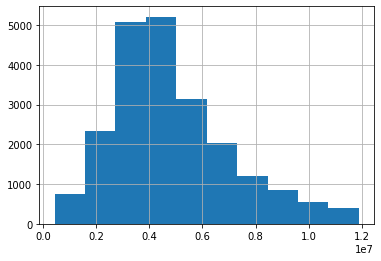

In [93]:
data['last_price'].hist(range=(430000, 11889500));

Основная масса квартир нахоидтся в диапазоне стоимости от 3 до 7 млн. Пик приходится на 4 млн, такая цена указана в более, чем 4 тысячах объявлений. Так как нам представлены данные до 2020 года и не только по Питеру, но и по ближайшей негородской местности, такая цена вполне может быть. Около 1000 квартир стоят дороже 10 млн, а примерно 2000 квартир дешевле 2 млн.
Распределение ближе к распределению Пуассона. 
Пока это всё, что можно сказать о стоимости, дальше мы посмотрим, от чего она может зависеть и как распределяется по населенным пунктам, а пока перейдем к гистограмме следующего столбца - посмотрим на площади.

In [94]:
whiskers('total_area')

[12.0, 114.25]

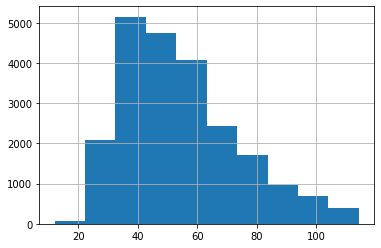

In [95]:
data['total_area'].hist(range=(12.0,114.25));

На данной гистограмме мы снова видим распределение Пуассона, хоть оно уже стремится к колоколообразной форме, как у распределения Гаусса, но всё же есть небольшое смещение к нижней границе. 
Большая часть квартир из объявлений имеет общую площадь от 30 до 60 м^2, наверное, это, действительно, самые распространенные значения площади квартир, ими могут быть как студии, так и современные трехкомнатные.
Совсем малая часть квартир имеет площадь менее 20 квадратных метров, наверное, менее 100 таких квартир, около 350-400 квартир выходят за рамки 100 квадратов.
Мы взяли значения, которые входят в 1.5межквартильный размах, в описании мы видели максимальное значение 900 квадратных метров, интересно, что эта не та квартира с максимальной стоимостью, было бы более логично, но и такие огромные квартиры могут быть и они, действительно, продаются в Москве и Питере (я проверяла).

In [96]:
whiskers('living_area')

[5.4, 79.0]

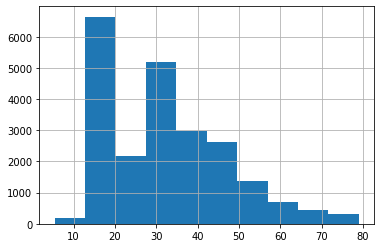

In [97]:
data['living_area'].hist(range=(5.4, 79.0));

На гистограмме мы наблюдаем два пика значений: жилая площадь 15-20 кв метров и 28-35 кв метров, в принципе, это соответсвует значениям в общей площади (30-70 квадратов), интересный "провал" в диапазоне 20-28 квадратных метров, может быть, есть какие-то стандарты по постройке новостроек и домов старого фонда, может быть, это связано с тем, что некоторые значения мы заполняли медианами, потому они превалируют в данном случае. Менее 200 квартир имеют жилую площадь менее 15 кв метров, возможно, это небольшие студии или однушки, есть и квартиры с жилой площадью более 70 кв метров.

In [98]:
whiskers('kitchen_area')

[1.3, 17.8]

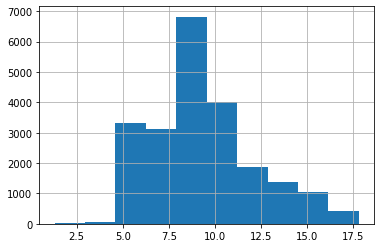

In [99]:
data['kitchen_area'].hist(range=(1.3,17.8));

Здесь мы видим стойкий пик между 7.5 и 10 квадратными метрами, есть совсем небольшие кухни, аткое вполне может быть в тех же хрущевках небольшой площадью, есть кухни от 13 кв метров.
Это вполне соответствует нашим данным: общая площадь 30-70, жилая площадь 15-20 и 28-35, кухня 7.5-10 - среднестатистическая квартира, которая продается на сайте.

In [100]:
whiskers('rooms')

[1.0, 6.0]

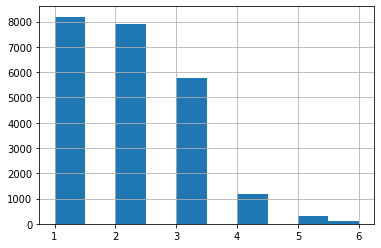

In [101]:
data['rooms'].hist(range=(1,6));

Большая часть квартир имеют 1 комнату (скорее всего, это связано еще и с тем, что мы указали единички во всех квартирах со свободной планировкой, но там может быть больше комнат). На втором месте идут 2комнатные квартиры, трешек еще меньше, а большее количество комнат и вовсе встречается чуть более 1000 раз.
Гистограммы вполне не противоречат друг другу: самый частый "лот" 1-2 комнатная квартира от 30 до 70 квадратных метров от 3 до 7 млн рублей, всё очень даже правдоподобно.
В описании даных была квартира с 19 (!) комнатами, я пыталась найти что-то подобное на просторах интернета, изучила строку с этой квартирой, но склоняюсь к тому, что это какая-то ошибка в данных, может быть, комнат всё-таки 9, а не 19.

Посмотри на распределение высоты потолков:

In [102]:
whiskers('ceiling_height')

[2.45, 2.8500000000000005]

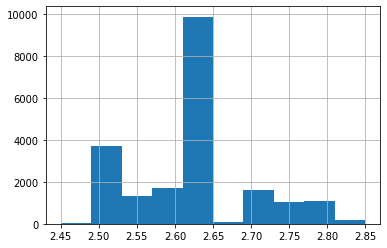

In [103]:
data['ceiling_height'].hist(range=(2.45, 2.85));

Подавляющее большинство квартир имеют высоту потолка 2.60-2.65м, что соответствует ожиданиям. Интересный "провал" между 2.65 и 2.68м, может быть, связано с какими-то стандартами, большинство новостроек имеет определенную высоту потолков (260-265), старый фонд или квартиры бизнес-класса имеют более высокие потолки, ближе к 3м (и даже более), а между 265 и 270см потолки менее типичны. Жаль, у нас нет данных о годе постройки дома, можно было бы найти какую-то закономерность явно. 
Есть небольшой пик в диапазоне 2.48-2.52м, скорее всего, это хрущевки, в которых по стандартам потолки составляют 2.5м.
Также в данных есть потолки 6-8-10-14 метров, если 4-6 метров еще можно представить: есть квартиры типа "лофт" со вторым этажом, где идет высокий потолок. А вот 8 и более метров похожу на ошибочные данные, но мы от них не избавлялись, так как медиану они не искажают.

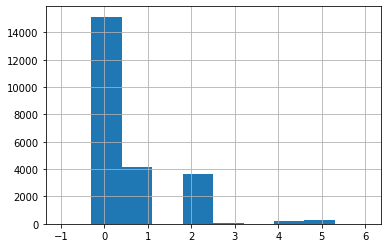

In [104]:
data['balcony'].hist(range=(-1, 6));

Большая часть квартир, представленных на сайте, не имеет балконов, около 8 тысяч квартир с 1-2 балконами, еще более редко встречаются объекты с 4-5 балконами.

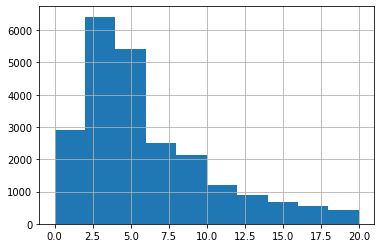

In [105]:
data['floor'].hist(range=(0,20));

Большая часть квартир располагается на 2-6 этажах. Наверное, это действительно довольно популярные этажи: есть как в новостройках, так и в старых домах, чуть менее популярны первые этажи, раньше люди вообще старались не брать квартиры на 1 этаже, сейчас это в прошлом, но всё же. Плюс первые этажи часто бывают заняты магазинами или офисными помещениями. 
Ну и постепенно с ростом этажа снижается частота, что логично, ведь не в каждом доме есть 15 или 20 этаж.

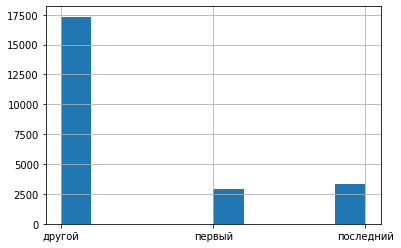

In [106]:
data['floor_type'].hist();

Конечно, большая часть квартир расположена на промежуточных этажах (не первый и не последний), хотя бы потому, что в эту категорию попадает большая часть этажей. Примерно равное количество квартир находятся на первом и последнем этажах, на последнем примерно на 500 квартир больше, что может связано, опять же, с наличием офисов или магазинов на первых этажах.

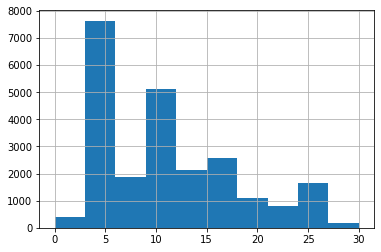

In [107]:
data['floors_total'].hist(range=(0, 30));

Большинство домов в Ленинградской области имеет 4-5 этажей (хрущевки, сталинки, но также и новостройки), также чуть поменьше пик 9-10-этажных зданий, ну а более высокие дома встречаются реже. Провал с 5 по 9 этажи вполне логичен, 6- или 8-этажные дома довольно редкий случай.
Ну и такая гистограмма не противоречит предыдущим выводам о том, что большинство квартир расположены на 2-6 этажах, тк эта этажность есть у большинства домов.

In [108]:
whiskers('city_centers_nearest')

[181.0, 26855.5]

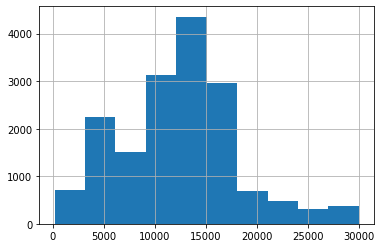

In [109]:
data['city_centers_nearest'].hist(range=(181, 30000));

По данной гистограмме можем сделать вывод, что большая часть недвижимости находится в пределах 10-16 км от центра, да в самом Питере очень много спальных районов и, соответственно, большая часть квартир может быть сконцентрирована там. Более отдаленных квартир от центра меньше, а после 30 км вообще менее 1000 объектов, но это может связано с тем, что во многих населенных пунктах мы не заполняли пропуски с этими данными.

In [110]:
whiskers('airports_nearest')

[0.0, 65347.0]

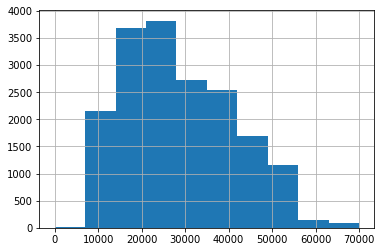

In [111]:
data['airports_nearest'].hist(range=(1, 70000));

В Питере аэропорт располагается за городом, поэтому и большая часть объектов расположена в пределах 15-30 км от него, немало квартир и в 30-40 км, возможно, это где-то ближе к центре Питера. В ряде населенных пунктов значений расстояния до аэропортов не было, поэтому не так много объектов на данной гистограмме за пределами 55 км от аэропорта.

In [112]:
whiskers('parks_nearest')

[0.0, 1150.0]

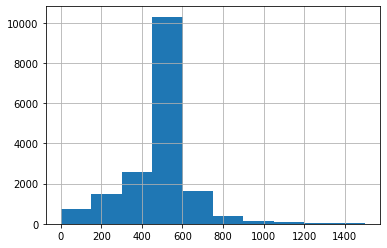

In [113]:
data['parks_nearest'].hist(range=(1, 1500));

По данным гистограммы большая часть объектов имеет парк в пределах 400-600 метров. В Питере есть несколько парков, да, такое вполне возможно, что многие квартиры имеют по-близости места для прогулок. Так как в ряде населенных пунктов, в принципе, нет парков, то и оценить расстояние до них мы не можем. Также очень малой части домов (около 100) не очень повезло и до ближайшего парка полтора километра.

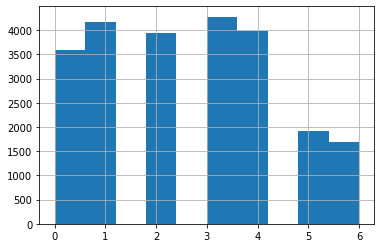

In [114]:
data['weekday'].hist(range=(0, 6));

Объявления выкладывают чаще в будние дни, это вполне логично, во-первых, могут помогать риелторы с продажей квартир и, допустим, они работают преимущественно в будние, во-вторых, в принципе, в выходные большинство людей старается отдыхать и не грузить себя вопросами продажи жилья.

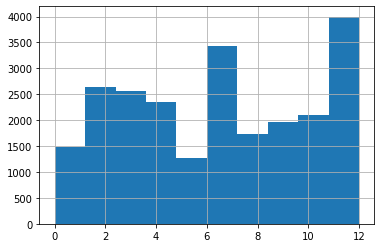

In [115]:
data['month'].hist(range=(0, 12));

Два ярких пика: декабрь и июнь. Летние месяцы, возможно, популярны, потому что увеличивается количество объявлений перед приездом студентов, ведь кто-то может позволить себе сразу квартиру, может быть, связано с отпуском в июне, тк появляется время подумать о продаже квартиры. Перед Новым годом, может быть, люди пытаются закрыть все вопросы перед началом года, а вот в январе небольшое затишье, праздники, явно не до продажи недвижимости. Также провал наблюдается в мае, может быть, связано с тем, что многие проводят время на даче, не успевают заниматься жилищными вопросами.

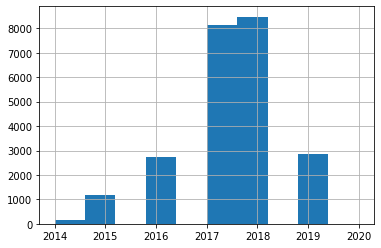

In [116]:
data['year'].hist(range=(2014, 2020));

Наибольшая популярность приходится на 2017-2018 годы, сервис появился в 2010 году, но, возможно, он еще не пользовался большой популярностью в 2014-2015 годах, поэтому объявлений в разы меньше.
В 2019 наблюдается резкий провал, возможно, потому что данные выгружали в этот год и он еще не закончился на тот момент, а может быть, люди по какой-то причине резко перешли на другой сервис, но выглядит это странным, первая причина более реальна.

### Вывод:
Среднестатистическая квартира среди объявлений на Яндекс Недвижимости имеет стоимость от 3 до 7 млн, общую площадь от 30 до 70 кв метров, высоту потолков стандартные 2.60-2.65, в основном это 1-2 комнатные квартиры, расположенные на 2-6 этажах 5 или 9-10 этажных домов. Среди квартир, расположенных в населенных пунктах, в которых есть парки, большиснтво имеет хотя бы один парк в пределах 600м. Однако большая часть объектов удалена от аэропорта (в Питере он за городом).\
Наибольшая активность по публикации объявлений наблюдается в будние дни, в июне и декабре месяце, а спад активности наблюдается в выходные, в мае и январе. Наибольшей популярностью сервис пользовался в 2017-2018 годах.

### 3.2 Изучение скорости продажи недвижимости

В данном датафрейме скорость продажи мы оцениваем по дням, как долго находилось объявление на сайте. У нас около 3000 строк имеют пропуски в этом пункте, скорее всего, пропуски связаны с тем, что объявление забыли удалить с сайта. Но не исключен и сбой при выгрузке данных. \
Снача аоценим гистограмму по длительности публикации:

In [117]:
whiskers('days_exposition')

[1.0, 512.5]

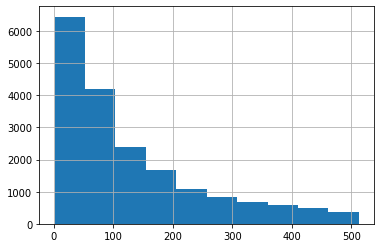

In [118]:
data['days_exposition'].hist(range=(1, 512.5));

Из гистограммы мы видим, что большая часть квартир продавалась менее, чем за 100 дней (это чуть больше 3 месяцев), это очень хороший результат, квартиры покупали довольно быстро. Есть квартиры, которые не покупали и более года (500 дней), но их небольшое число, такое тоже может быть. Интересно было бы еще посмотреть наличие или отсутствие помощи риелтора, агенста, влияет ли это на скорость продажи. Но мы еще изучим, какие факторы могут повлиять на сроки продажи. \ 

Изучим среднее и медианное число дней:

In [119]:
print('Среднее количество дней продажи:', (data['days_exposition'].mean()).round(1))
print('Медианное количество дней продажи:', data['days_exposition'].median())

Среднее количество дней продажи: 180.8
Медианное количество дней продажи: 95.0


А вот здесь мы наблюдаем разницу в два раза, насколько завышено среднее количество дней. Еще из описания данных было видно, что есть сверхдолгие продажи (1580 дней - это более 4 лет), скорее всего, это связано с тем, что про объявление забыли и не сняли с публикации, либо произошла какая-то ошибка при выгрузке данных или связанная с человеческим фактором.
Такой результат еще раз подчеркивает важность использования медианы для заполнения пропусков, ввиду ее устойчивости к аномальным значениям. \
В описании данных было и минимальное значение - 1 день, продажи в течение нескольких дней можно считать сверхбыстрыми. Может быть, всё так совпало и кто-то увидел квартиру мечты и тут же "схватил" ее, может условия были максимально выгодные, может быть, люди выкладывали объявления на другие ресурсы (авито, циан), потом выложили на Яндекс Недвижимость и так совпало, что сделка состоялась, объявлении тут же убрали, также это могут быть какие-то мошеннические схемы или вновь человеческий фактор или техническая ошибка.

### Вывод:
Большинство квартир было продано в течение 3х месяцев, медианное значение продажи 95 дней. Это довольно хорошая скорость продажи, значит сервис пользуется спросом и эффективен. \
Есть сверхдолгие продажи - более 4 лет - которые сдвигают среднее значение в болшую сторону, такие данные могут быть получены из-за забывчивости пользователей, которые не сняли объявление с публикации, можно подумать о системе очистки объявлений, находящихся на сайте более 3 лет. Сверхбыстрые продажи в течение нескольких дней могут быть действительно совпадением, а могут быть и мошенническими схемами, на что тоже нужно обратить внимание и повысить безопасность сервиса.

### 3.3 Влияние различных факторов на стоимость квартир

Теперь изучим, какие факторы и как могут влиять на стоимость квартиры.
Сначала моей мыслью было составить матрицы диаграмм рассеяния, но так как некоторые выбросы, не входящие в нормальный диапазон, мы оставили, да и для большей наглядности я решила составить диаграммы по каждому показтелю и сделать выводы отдельно по всем факторам.

Начнем с самого очевидного - общая площадь:

0.680567142853925


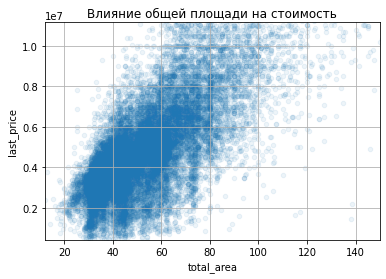

In [120]:
print(data['total_area'].corr(data['last_price'])) #считаем корреляцию по Пирсону
data.plot(x='total_area', y='last_price', kind='scatter', grid=1, alpha=0.08, xlim=(12,150), ylim=(430000, 11150000), title='Влияние общей площади на стоимость'); #строим 
#диаграмму рассеяния

Для анализа я взяла значения величин, которые входят в нормальный диапазон, без выбросов, иначе диаграмма получается не показательна. 
И мы по графику мы можем видеть, что зависимость стоимости от общей площади квартиры есть, чем выше площадь - тем выше цена. Есть небольшие "шумы" в виде единичных точек (140 кв м и менее 2 млн цена), но это не отрицает наличия взаимосвязи данных.
Также коэфицциент Пирсона равен 0.64 - что говорит о положительной корреляции, хотя и не настолько большой, как я предполагала.
 Значит, мы можем сделать вывод: да, стоимость квартиры зависит от ее общей площади.

С общей площадью понятно, а могут ли жилая и площадь кухни влиять на цену? В большей или меньшей степени?

In [121]:
print(whiskers('living_area'))
whiskers('kitchen_area')

[5.4, 79.0]


[1.3, 17.8]

0.5953551470787749


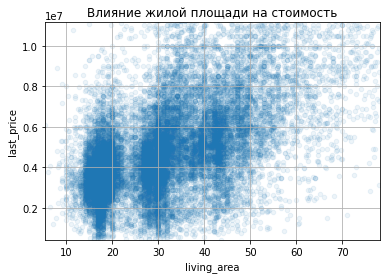

In [122]:
print(data['living_area'].corr(data['last_price'])) #считаем корреляцию по Пирсону
data.plot(x='living_area', y='last_price', kind='scatter', grid=1, alpha=0.08, xlim=(5.4,78.1), ylim=(430000, 11150000), title='Влияние жилой площади на стоимость'); #строим 
#диаграмму рассеяния

На этой диаграмме заметно, что зависимость уже более слабая. Интересно, что зависимость немного усиливается при жилой площади от 50 и стоимости от 8 млн, а в основной массе 20-40 кв метров зависимости практически нет, такие квартиры могут стоить и 1 млн, и 6 млн. Но некая тенденция есть: чем выше жилая площадь, чем выше цена.
Коэффициент корреляции здесь тоже меньше, чем при исследовании общей площади, и равен 0.56. 
Вывод: есть слабая корреляция между жилой площадью и стоимостью, которая больше выражена при площади более 50 кв метров, однако, прогнозировать стоимость или оценивать квартиру по такому параметру не стоит.

0.4908386998127713


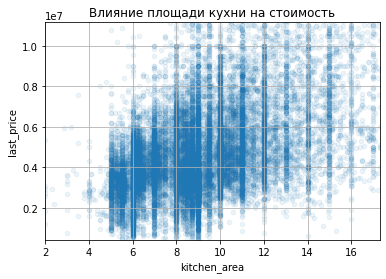

In [123]:
print(data['kitchen_area'].corr(data['last_price'])) #считаем корреляцию по Пирсону
data.plot(x='kitchen_area', y='last_price', kind='scatter', grid=1, alpha=0.08, xlim=(2,17.3), ylim=(430000, 11150000), title='Влияние площади кухни на стоимость'); #строим 
#диаграмму рассеяния

Интересно, еще более слабая зависимость, много квартир с одинаковой площадью кухни, но довольно большим разбросом цен. 
Коэффициент корреляции Пирсона ниже, чем у жилой площади, составляет 0.44. 
Из этой диаграммы можно сделать вывод: что площадь кухни влияет на стоимость в меньшей степени, чем другие площади, цена практически не зависит от площади кухни, это не лучший показатель, чтобы как-то прогнозировать стоимость или оценивать квартиру

Влияет ли количество комнат на стоимость квартиры?

In [124]:
room_price = data.pivot_table(index='rooms', values='last_price').reset_index()
room_price.columns = ['rooms', 'mean_price'] #создаем сводную таблицу, в которой указана средняя цена по количеству комнат

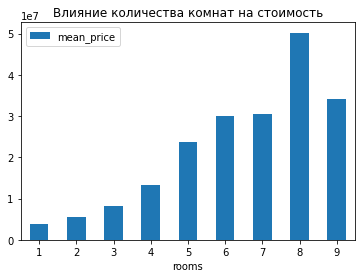

In [125]:
room_price.plot.bar(x='rooms', y='mean_price', rot=0, title='Влияние количества комнат на стоимость');

Из диаграммы видно, что есть прямая зависимость между количеством комнат и средней стоимостью, что и логично, чем больше комнат - тем выше площадь (чаще всего) - тем выше и цена. Интересно, что основной пик стоимости находится у 8-комнатных квартир, средняя цена которых даже выше, чем у 9 комнатных, но здесь играет свою роль еще и площадь, не всегда большое количество комнат=большой площади, вспомним старые хрущевки, в которых комнатки совсем небольшие. \
Но разница между однушкой и даже 3-4 комнатной квартирой вполне заметна и ощутима.

Теперь посмотрим, как этаж влияет на стоимость:

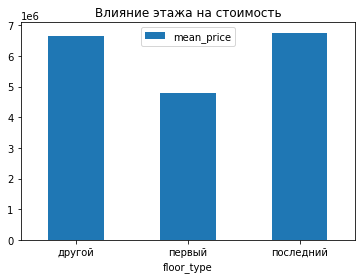

In [126]:
floor_price = data.pivot_table(index='floor_type', values='last_price').reset_index()
floor_price.columns = ['floor_type', 'mean_price']
floor_price.plot.bar(x='floor_type', y='mean_price', rot=0, title='Влияние этажа на стоимость');

По такой диаграмме сложно сказать, что есть какая-то зависимость. Да, средняя стоимость квартир на первом этаже немного ниже, чем на других, однако, цена квартир на последнем этаже не отличается от цен на других этажах. 
Небольшая разница с первым этажом может быть связано с тем, что квартиры на более высоких этажах продают с красивым видом или дополнительными террассами, панорамными окнами, это может влиять на стоимость. Однако однозначной зависимости нет.

Теперь определим, может ли дата публикации влиять на стоимость, вдруг летом или ближе к осени цены повышаются.

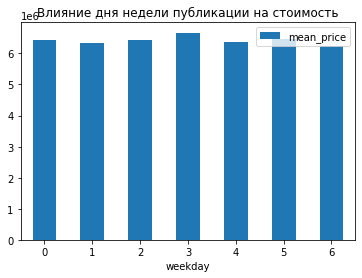

In [127]:
weekday_price = data.pivot_table(index='weekday', values='last_price').reset_index()
weekday_price.columns = ['weekday', 'mean_price']
weekday_price.plot.bar(x='weekday', y='mean_price', rot=0, title='Влияние дня недели публикации на стоимость');

По такой диаграмме можно смело сказать, что зависимости между днем публикации и стоиомостью квартиры нет. Что, в общем, и логично, вряд ли кто-то смог бы оправдать завышенную цену лишь потому, что он публиковал объявление в свой единственный выходной в воскресенье. На стоимость влият явно ряд других факторов.

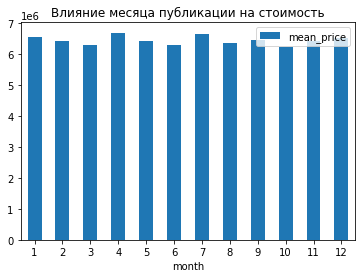

In [128]:
month_price = data.pivot_table(index='month', values='last_price').reset_index()
month_price.columns = ['month', 'mean_price']
month_price.plot.bar(x='month', y='mean_price', rot=0, title='Влияние месяца публикации на стоимость');

Месяц, в который было опубликовано объявление, в общем-то, тоже не влияет на стоимость объекта. Незначительные колебания средней стоимости присутсвуют, но явных изменений нет в течение всего года.

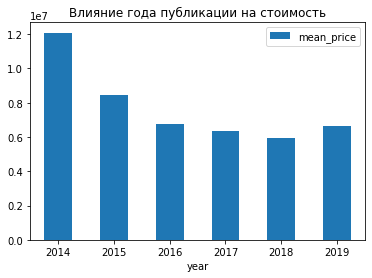

In [129]:
year_price = data.pivot_table(index='year', values='last_price').reset_index()
year_price.columns = ['year', 'mean_price']
year_price.plot.bar(x='year', y='mean_price', rot=0, title='Влияние года публикации на стоимость');

Интересно, в 2014 году была максимальная стоимость на квартиры на фоне небольшой популярности сервиса. Может быть, это связано с событиями того времени, ведь именно в 2014 году был резкий скачек курса доллара относительно рубля, и продавцы решили завысить и стоимость квартир. Постепенно средняя цена на квартиры выровнялась ис 2016 по 2019 претерпевала лишь незначительные изменения. \
Можно сказать, что от года публикации вряд ли напрямую зависит стоимость квартиры, скорее, могут влиять другие факторы и события в мире, но не сама дата.

### Вывод:
Таким образом, в ходе исследования мы выяснили, что на стоимость квартиры в большей степени влияет общая площадь квартиры, связь цены и жилой или кухонной площади более слабая. Также на среднюю стоимость влияет количество комнат. 
Объекты на первом этаже немного дешевле, чем на других, но явной зависимости средней стоимости от этажа нет: последний этаж равнозначен и любым другим. От даты публикации средняя стоимость на квартиры не зависит. Хоть и есть некоторые изменения цены в разные годы публикации, они могут быть связаны с совершенно другими факторами. \
Дальше посмотрим влияние расстояния до центра, наличия парков и водоемов вблизи и типа населенного пункта на стоимость.

### 3.4 Влияние картографических показателей на стоимость квартир, расчет средней стоимости одного километра до центра

Посмотрим, влияет ли наличие парка или водоема в радиусе 3 км от дома на стоимость объектов. 
Напомню, что в некоторых населенных пунктах вообще нет парков и\или водоемов поблизости.

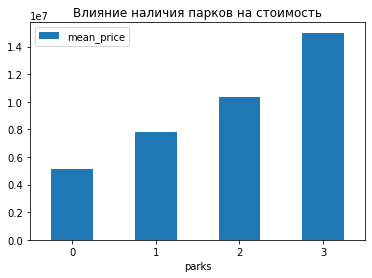

In [130]:
parks_price = data.pivot_table(index='parks_around3000', values='last_price').reset_index()
parks_price.columns = ['parks', 'mean_price']
parks_price.plot.bar(x='parks', y='mean_price', rot=0, title='Влияние наличия парков на стоимость');

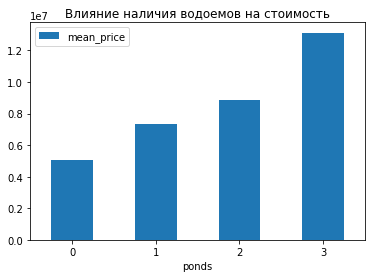

In [131]:
ponds_price = data.pivot_table(index='ponds_around3000', values='last_price').reset_index()
ponds_price.columns = ['ponds', 'mean_price']
ponds_price.plot.bar(x='ponds', y='mean_price', rot=0, title='Влияние наличия водоемов на стоимость');

На столбчатых диаграммах мы видим постепенный рост средней стоимости, прямо пропорциональный количеству парков в радиусе 3 км. Так, самые дорогие объекты имеют по 3 парка и\или водоема рядом.

Теперь хочу посмотреть, как меняется цена за квадрат в различных типах населенных пунктов. Вероятнее всего, в городе цена за квадрат выше, но вдруг с ним поконкурируют какие-нибудь коттеджные посёлки.

In [132]:
data.pivot_table(index='locality_type', values='price_for_m2', aggfunc='median').sort_values(by='price_for_m2', ascending=True)

,price_for_m2
locality_type,
садовое товарищество,40972.225
село,48689.520
пгт,52613.660
прочее,67142.860
деревня,68712.185
поселок,76470.590
город,104761.900


Что и следовало ожидать: максимальная цена за квадрат в Санкт-Петербурге, на втором месте поселки, возможно, как раз из-за коттеджных поселков и в связи с близостью к к городу.
В садовых товариществах цена за квадрат ниже, чем в других типах, ну, это можно было предположить, так как у СНТ есть ряд своих особенностей, которые могут влиять на стоимость.

Теперь выберем топ-10 населенных пунктов, где опубликовано больше всего объявлений и выберем из них населенные пункты с максимальной и минимальной ценами за квадрат:

In [133]:
top10 = data.pivot_table(index='locality_name', values = 'price_for_m2', aggfunc=['count', 'mean']). reset_index() #создаем список топ-10
top10.columns = ['locality_name','count', 'mean'] #переименуем столбцы для удобства
top10 = top10.sort_values(by='count', ascending=False).head(10) #отсечем только первые 10 значений по количеству объявлений
top10 #и выведем топ-10

,locality_name,count,mean
298,Санкт-Петербург,15648,114639.035226
145,Мурино,551,85601.120762
258,Шушары,439,78551.344647
268,Всеволожск,398,68654.473970
297,Пушкин,369,103125.819377
278,Колпино,338,75424.579112
162,Парголово,327,90175.913089
271,Гатчина,307,68746.146515
115,Кудрово,299,92473.547559
269,Выборг,237,58141.909325


In [134]:
top10.loc[top10['mean'] == top10['mean'].min()]

,locality_name,count,mean
269,Выборг,237,58141.909325


In [135]:
top10.loc[top10['mean'] == top10['mean'].max()]

,locality_name,count,mean
298,Санкт-Петербург,15648,114639.035226


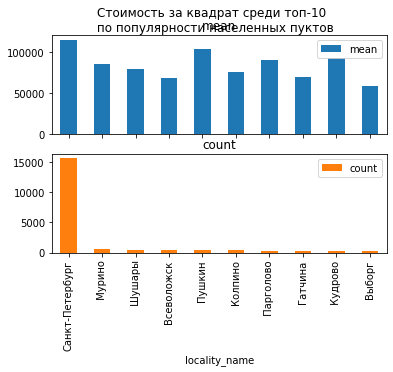

In [136]:
top10.plot.bar(x='locality_name', y=['mean', 'count'], subplots=True, title='Стоимость за квадрат среди топ-10 \n по популярности населенных пуктов');

Интересно и ожидаемо, что популярность обратно пропорциональна стоимости квадратного метра. Несложно было предсказать, что в Санкт-Петербурге опубликовано больше всего объявлений о продаже квартиры и средняя стоимость за квадрат там максимально высокая.
А вот самые бюджетные варианты из популярных населенных пунктов следует искать в Выборге. 57 тысяч за квадрат - очень даже неплохо.

Теперь посмотрим, как влияет расстояния до центра в Санкт-Петербурге на стоимость недвижимости, расчитаем среднюю стоимость километра до центра.

In [137]:
price_for_km = data.loc[data['locality_name'] == 'Санкт-Петербург']
price_for_km = price_for_km.pivot_table(index='centers_km', values='last_price', aggfunc=['count', 'mean']).reset_index()
price_for_km.columns = ['centers_km', 'count', 'mean']
price_for_km['price_for_km'] = ((price_for_km['mean'] / price_for_km.loc[price_for_km['centers_km'] > 0, 'centers_km']) / 1000).round(1)
price_for_km

,centers_km,count,mean,price_for_km
0,0.0,27,3.144912e+07,NaN
1,1.0,192,2.109703e+07,21097.0
2,2.0,309,1.766900e+07,8834.5
3,3.0,349,1.109502e+07,3698.3
4,4.0,692,1.215449e+07,3038.6
5,5.0,911,1.352084e+07,2704.2
6,6.0,615,1.492708e+07,2487.8
7,7.0,419,1.479526e+07,2113.6
8,8.0,594,9.211502e+06,1151.4
9,9.0,595,6.959275e+06,773.3


Максимально отдаленные от центра квартиры в Питере находится в 29 км, есть 27 квартир, которые находятся в пределах одного километра до центра. 
Логично, что чем дальше квартира от центра, тем дешевле стоимость километра. Так 1 км отдаленных квартир стоит в пределах 200 тысяч, а за близость к центру придется отдать 21 млн.
Однако интересно, что на 27 километре от центра есть 2 квартиры с высокой средней стоимостью (более 8 млн), относительно других соседних квартир, и соответственно, с довольно высокой стоимостью за 1 км. Возможно, там находится какой-то ЖК бизнес-класса, может быть, это частные дома в пределах города, а может быть, продавец завысил стоимость такой квартиры.
Примерно с 9 км от центра цена резко падает в 1.5 раза, видимо, всё, что дальше 8 километров от центра - уже не считается центральным районом Питера, а всё, что ближе - это еще центр.

In [138]:
price_for_km['centers_km'].corr(price_for_km['mean'])

-0.7507562471269806

Коэффициент Пирсона также подтверждает, что средняя стоимость жилья зависит от расстояния до центра, чем больше расстояние - тем ниже стоимость. Что, в общем-то, очевидно.

### 3.5 Оценка дополнительных параметров, которые могут влиять на скорость продажи

Посомтрим, где жилье быстрее всего покупают. Мешает ли высокая стоимость продаже квартир в Санкт-Петербурге?

In [139]:
data.pivot_table(index='locality_name', values='days_exposition', aggfunc='mean').sort_values(by='days_exposition', ascending=True).head(10)

,days_exposition
locality_name,
Володарское,5.0
Заводской,5.0
садовое Садко,7.0
Счастье,7.0
Малая Романовка,9.0
Семиозерье,9.0
Шум,9.0
Новогорелово,17.9
Платформа 69-й километр,18.0


In [140]:
data.pivot_table(index='locality_name', values='days_exposition', aggfunc='mean').sort_values(by='days_exposition', ascending=True).tail(10)

,days_exposition
locality_name,
Ваганово,462.333333
Лисий Нос,518.000000
Любань,531.000000
Мины,540.000000
Рябово,574.500000
Большая Пустомержа,627.000000
Коробицыно,750.000000
Молодежное,786.000000
Рабитицы,1007.000000


Санкт-Петербурга нет ни в лидерах, ни в аутсайдерах по скорости продажи, значит, какое-то среднее значение. Не очень понятно, с чем связана такая быстрая продажа квартир в некоторых населенных пунктах (всего 5 дней) или наоборот длительный поиск покупателей (почти 3 года). Последнее можно связать с тем, что люди просто забывают удалять объявление.

In [141]:
data.pivot_table(index='locality_type', values='days_exposition', aggfunc='mean').sort_values(by='days_exposition', ascending=False)

,days_exposition
locality_type,
деревня,193.124700
село,192.800000
город,182.827160
прочее,181.047645
пгт,172.659193
поселок,162.473379
садовое товарищество,119.666667


Вот так стало немного понятнее: быстрее продается недвижимость в СНТ, может, это связано с минимальной стоимостью за квадрат среди всех типов населенных пунктов или со своими особенностями садовых товариществ.
А вот в деревнях дольше всего придется ждать покупателя на недвижимость.

Если это не городская местность, то как расстояние до центра города влияет на скорость продажи:

In [142]:
no_city = data.loc[(data['locality_type'] != 'город') & ~(data['centers_km'].isna())] 

0.07350692499984576


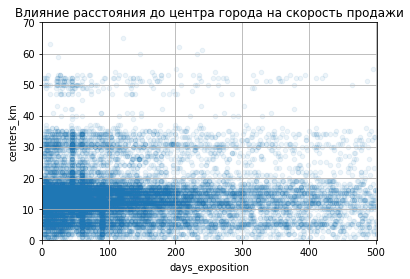

In [143]:
print(no_city['centers_km'].corr(data['days_exposition'])) #считаем корреляцию по Пирсону
data.plot(x='days_exposition', y='centers_km', kind='scatter', grid=1, alpha=0.08, xlim=(0,501), ylim=(0, 70), title='Влияние расстояния до центра города на скорость продажи');

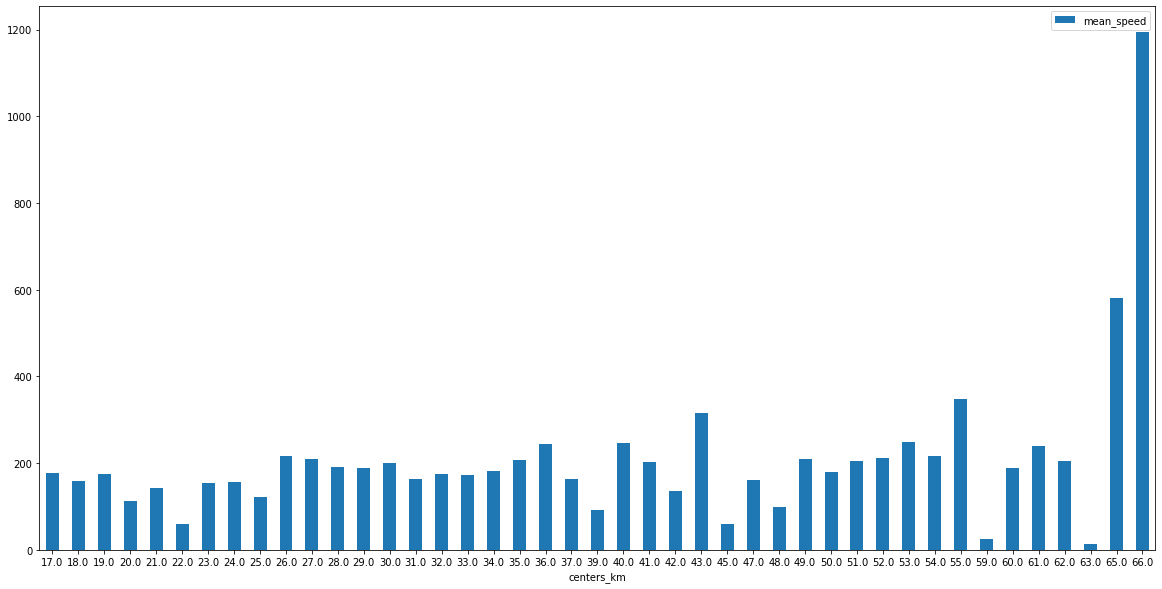

In [144]:
center_speed = no_city.pivot_table(index='centers_km', values='days_exposition').reset_index()
center_speed.columns = ['centers_km', 'mean_speed']
center_speed.plot.bar(x='centers_km', y='mean_speed', rot=0, figsize=(20, 10));

Не очень "красивая" получилась диаграмма рассеяния, поэтому решила попробовать сделать столбчатую диаграмму для наглядности. Но мы можем сделать вывод, что расстояние до центра среди населенных пунктов не городской местности не влияет на скорость продажи. Скорее всего, жилье покупают жители именно этих населенных пунктов, которые там живут, там работают и им не столь важно расстояние до центра Питера. Хотя в самых отдаленных районах скорость продажи значительно ниже, чем в других, но это может быть связано с другими факторами, например, жители тех населенных пунктов реже пользуются данным сервисом, он неочень эффективен для продажи жилья именно там. Но и также надо иметь в виду, что часть значений остались пропущенными.

Есть у нас еще такой столбец `total_images` - сколько фотографий объекта представлено на сайте и представлено ли вообще. Мне кажется, это должно как-то коррелировать со скоростью продажи: ведь в первую очередь смотрят фото недвижимости. Посмотрим, подтвердится ли эта гипотеза:

In [145]:
whiskers('total_images')

[0.0, 26.0]

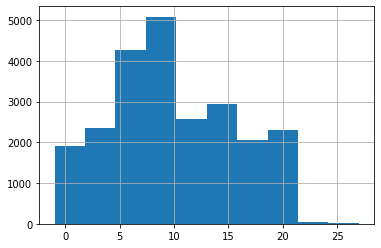

In [146]:
data['total_images'].hist(range=(-1,27));

Большинство пользователей добавляют фото к объявлениям, в основном 5-10 фотографий, однако есть и любители более подробной картинки и загружают более 20 изображений объекта. Но есть и  те, кто вовсе не нагружает себя лишний раз и не выставляет никаких фото.

In [147]:
print(data['days_exposition'].corr(data['total_images']))

-0.02720894250787657


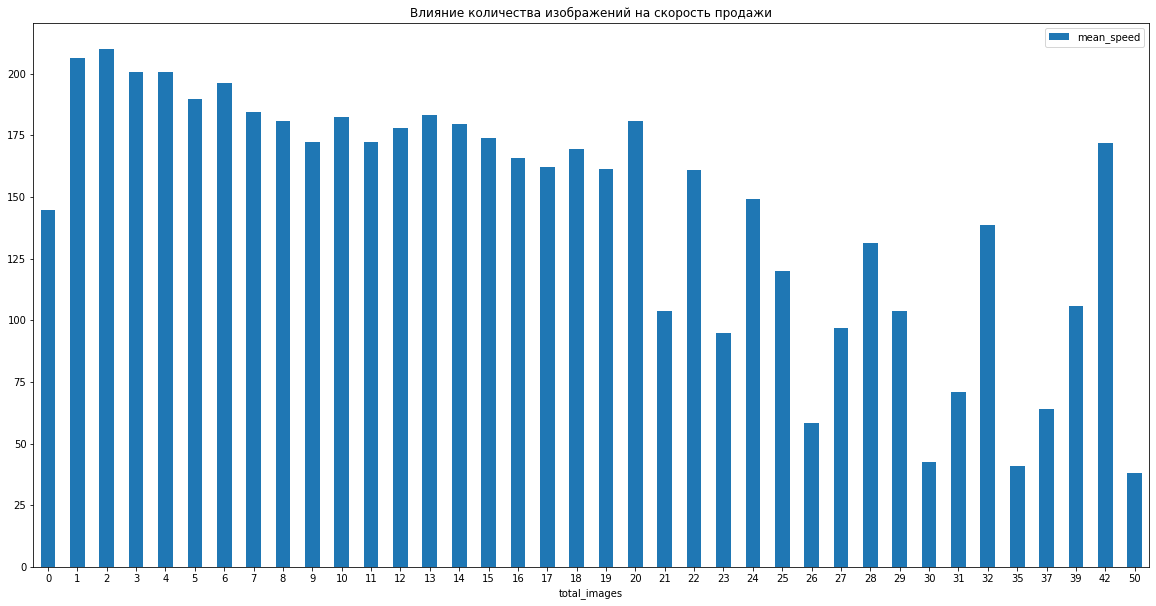

In [148]:
image_speed = data.pivot_table(index='total_images', values='days_exposition').reset_index()
image_speed.columns = ['total_images', 'mean_speed']
image_speed.plot.bar(x='total_images', y='mean_speed', rot=0, figsize=(20,10), title='Влияние количества изображений на скорость продажи');

Мы видим, что количество изображений не влияет на скорость продажи. Меня немного удивил такой результат, гипотеза не подтвердилась. И средняя длительность нахождения объявления на сайте среди объектов с фото даже чуть выше, чем объектов без фото. Видимо, эти предложения были более выгодные и люди осматривали квартиру уже лично, а не по фото.

## 4 Вывод

В ходе исследования данные были обработаны и подготовлены к анализу. 

**1. Работа с пропусками:** 

Пропуски в категориальных данных (таких, как является ли жилье апартаментами) были заполнены значениями, исходя из логических размышлений: если пункт пропущен, скорее всего, человек не совсем разобрался, что это означает или не обратил внимание, поэтому такие объявления вряд ли являются действительно апартаментами. Часть пропусков в количественных данных была заполнена медианными значениями, например, высота потолков, некоторые показатели площади, расстояние до центра внутри города, данные о водоемах и прудах в тех населенных пунктах, где они есть. Некоторые пропущенные значения были удалены, ввиду невозможности заполнить их. Всего в ходе предобработки было потеряно менее 10% данных. Некоторые пропуски решено было оставить, расчетам они не мешают, удалять их не рационально, тк потеряется большой объем данных. Например, пропуски информации о расстоянии до центра и количестве дней размещения объвления.
В дальнейшем можно подумать, как избежать таких пропусков. Может быть, с помощью систем навигации и координатов рассчитывать расстояния автоматически, создать систему очистки объявлений давностью более 3 лет, более подробно описать пункт об апартаментах или создать отдельную категорию таких объявлений. 

**2. Дубликаты:**

В ходе исследования были обнаружены неявные дубликаты, например, "поселок" и "посёлок", "поселок Мурино" и просто "Мурино". Во время предобработки такие дубликаты были устранены и приведены к единому написанию, а по типам населенных пунктов был создан отдельный столбец. Можно избежать таких неточностей, если сделать полуавтоматическое заполнение ячеек с адресом, когда пользователь начинает набирать название, ему всплывает вариант.

**3. Аномальные значения:**

Были обнаружены аномальные значения в данных, например, потолки 1 метр или 10 метров или 19 комнат квартир. В результате предобработки некоторые аномалии были удалены из датафрейма, было потеряно менее 10% данных. Анализ проводился по нормальным диапазонам. В будущем, чтобы избежать таких ошибок, можно создать систему ограничения при введении, например, нельзя ввести высоту потолка более 6 метров. Вряд ли более высокие квартиры существуют, а в исключительных случаях пользователь может оставлять информацию в описании объекта.

**Выводы:**

1. В ходе анализа определена модель квартиры, которая чаще всего продается в Ленинградской области: это 1-2-комнатная квартира стоимостью 3-7 млн, общей площадью 30-70 кв метров, расположенная на 2-6 этаже многоэтажного дома, которая продается в течение 3 месяцев. Пик активности по размещению объявлений приходится на будние дни, в июне или декабре, спад активности наблюдается по выходным, в мае и январе. Наибольшая популярность сайта в 2017-2018 году.

2. На формирование стоимости недвижимости влияют такие факторы, как общая площадь, количество комнат менее выражена зависимост от жилой и кухонной площадей. Квартиры на первом этаже немного дешевле других, однако однозначной связи стоимости с ростом этажа нет. От даты публикации средняя стоимость объектов не зависит, сокрее, могут влиять другие факторы и события в мире.

3. Наибольшая стоимость за квадратный метр недвижимости - в Санкт-Петербурге. В топ-10 самых популярных населенных пунктов, помимо самого города, вошли Мурино, Шушары, Выборг, Кудрово, Гатчина, Всеволжск, Пушкин, Колпино, Парголово. Из них самая доступная стоимость на жилье в Выборге.

4. Среди картографических показателей самым определяющим для стоимости оказалось расстояние до центра, так, стоимость за каждый километр до центра в Санкт-Петербурге в разы снижается по мере отдаления от центра. Особенно резкий скачок наблюдается после 8км, вероятно, там и заканчивается центральный район. Также с ростом количества парков и вдоемов в радиусе 3 км - растет и стоимость на квартиру. Некотрые объекты имеют аж 3 парка и\или вдоема поблизости, у них и средняя стоимость выше остальных.

5. Быстрее всего покупают недвижимость в садовых товариществах, а вот в деревнях придется подождать после публикации объявления. 

6. Какие-то еще факторы, влияющие на скорость продажи установить не удалось: даже количество изображений не влияет на то, как быстро пользователь продаст квартиру.

**Практическая значимость:**
Обнаруженные ошибки и не точности в данных помогут улучшить их сбор и хранение на сервисе. 
Можно прогнозировать среднюю стоимость квартиры, учитывая расстояние до центра, расположение, площади, например, выводить для пользователя оценку подобной квартиры по данным сервиса (как на дроме). 
Подумать о дополнительной рекламе в малоактивные месяцы (май, январь).